# **BIPxTech-TeamSystem:** Analysis of Iva data and implement of Machine learning model



In [ ]:
!pip install openpyxl #We need this library to read the file in xlsx format

In [ ]:
# We import all the libraries that we need for our analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.models import load_model

# 1) Obtaining data



Load the file

In [ ]:
# Load the path to read the dataset
bip_data ='luiss_data_anonym.xlsx' # Everyone enter their own path to file
df = pd.read_excel(bip_data, engine='openpyxl')
print(df)

        Unnamed: 0  A   Ateco  B    C    DataDoc  D    E    F    G  ...  Rev  \
0                1  7  476220  N  NaN 2022-08-09  I  NaN  NaN  NaN  ...  NaN   
1                2  7  476220  N  NaN 2022-08-09  I  NaN  NaN  NaN  ...  NaN   
2                3  7  476220  N  NaN 2022-08-09  I  NaN  NaN  NaN  ...  NaN   
3                4  7  476220  N  NaN 2022-08-09  I  NaN  NaN  NaN  ...  NaN   
4                5  7  476220  N  NaN 2022-08-09  I  NaN  NaN  NaN  ...  NaN   
...            ... ..     ... ..  ...        ... ..  ...  ...  ...  ...  ...   
134432      234497  7  563000  N  9.0 2023-06-12  I  NaN  NaN  NaN  ...    N   
134433      234498  7  563000  N  9.0 2023-06-09  I  NaN  NaN  NaN  ...    N   
134434      234499  7  563000  N  9.0 2023-06-09  I  NaN  NaN  NaN  ...    N   
134435      234500  7  563000  N  9.0 2023-06-06  I  NaN  NaN  NaN  ...    N   
134436      234501  7  563000  N  9.0 2023-06-06  I  NaN  NaN  NaN  ...    N   

       CVia Rifamm  X Art2  Valore2 Art

In [ ]:
# This represent the dimension of the dataset, will display the number of observations (rows) and
# features (columns) in the dataset
df.shape

(134437, 45)

In [ ]:
# We display the top 10 observations of the dataset, the first 10 rows
df.head(10)

,Unnamed: 0,A,Ateco,B,C,DataDoc,D,E,F,G,...,Rev,CVia,Rifamm,X,Art2,Valore2,Art3,Valore3,TIva,Caus
0,1,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
1,2,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
2,3,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
3,4,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
4,5,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
5,6,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
6,7,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
7,8,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
8,9,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
9,10,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12


In [ ]:
# We also display the last 10 rows of the dataset, the last 10 observations
df.tail(10)

,Unnamed: 0,A,Ateco,B,C,DataDoc,D,E,F,G,...,Rev,CVia,Rifamm,X,Art2,Valore2,Art3,Valore3,TIva,Caus
134427,234492,7,563000,N,9.0,2023-06-20,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134428,234493,7,563000,N,9.0,2023-06-20,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134429,234494,7,563000,N,9.0,2023-06-16,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134430,234495,7,563000,N,9.0,2023-06-16,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134431,234496,7,563000,N,9.0,2023-06-12,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134432,234497,7,563000,N,9.0,2023-06-12,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134433,234498,7,563000,N,9.0,2023-06-09,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134434,234499,7,563000,N,9.0,2023-06-09,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134435,234500,7,563000,N,9.0,2023-06-06,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11
134436,234501,7,563000,N,9.0,2023-06-06,I,NaN,NaN,NaN,...,N,N,NaN,B,NaN,NaN,NaN,NaN,11,11


In [ ]:
# This command (.info()) helps us to understand the data type and information about our data,
# including the number of records in each column, data having null or not null,
# Data type and the memory usage of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134437 entries, 0 to 134436
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       134437 non-null  int64         
 1   A                134437 non-null  object        
 2   Ateco            134437 non-null  int64         
 3   B                134383 non-null  object        
 4   C                8757 non-null    float64       
 5   DataDoc          134437 non-null  datetime64[ns]
 6   D                134436 non-null  object        
 7   E                1795 non-null    object        
 8   F                1795 non-null    object        
 9   G                19 non-null      object        
 10  H                19 non-null      object        
 11  Tdoc             134437 non-null  object        
 12  VA               134437 non-null  object        
 13  CE               2091 non-null    object        
 14  DescrizioneRiga  133

In [ ]:
# We took a look at duplicate control: based on several unique values in each column and the data description,
# we can identify the continuous and categorical columns in the data;
# duplicated data can be handled or removed based on further analysis
df.nunique()

Unnamed: 0         134437
A                      13
Ateco                 387
B                       5
C                      41
DataDoc              1082
D                       3
E                       4
F                       6
G                       2
H                       2
Tdoc                   11
VA                      2
CE                      4
DescrizioneRiga     62567
Importo             22548
Iva                    24
Conto                 707
ContoStd              365
IvaM                   60
Comp                    0
Iva11                  16
TM                     12
%Forf                   4
Art1                  482
Valore1             44038
Nomenclatura            1
Ritac                  18
RF                     12
%RIT1                   8
%RIT2                   3
CoDitta               727
RifNormativo          650
CMar                    4
CTra                    2
Rev                     2
CVia                    2
Rifamm                159
X           

In [ ]:
# We study again the type of variables that are present in the dataset
print(df.dtypes)

Unnamed: 0                  int64
A                          object
Ateco                       int64
B                          object
C                         float64
DataDoc            datetime64[ns]
D                          object
E                          object
F                          object
G                          object
H                          object
Tdoc                       object
VA                         object
CE                         object
DescrizioneRiga            object
Importo                   float64
Iva                        object
Conto                       int64
ContoStd                    int64
IvaM                      float64
Comp                      float64
Iva11                     float64
TM                          int64
%Forf                     float64
Art1                       object
Valore1                    object
Nomenclatura               object
Ritac                     float64
RF                         object
%RIT1         

In [ ]:
# We calculate items count for each column
df.count()

Unnamed: 0         134437
A                  134437
Ateco              134437
B                  134383
C                    8757
DataDoc            134437
D                  134436
E                    1795
F                    1795
G                      19
H                      19
Tdoc               134437
VA                 134437
CE                   2091
DescrizioneRiga    133532
Importo            134437
Iva                134437
Conto              134437
ContoStd           134437
IvaM               133966
Comp                    0
Iva11               33813
TM                 134437
%Forf                  35
Art1               134389
Valore1            134362
Nomenclatura           21
Ritac                 731
RF                  55288
%RIT1              134437
%RIT2              134437
CoDitta            134437
RifNormativo        62952
CMar               134034
CTra               134353
Rev                132780
CVia               134437
Rifamm               1591
X           

# 2) Data Preprocessing: DATA SCRUB
The prepocess involves understanding, visualizing, and analyzing data to gain insights into its characteristics and relationships. Data preprocessing involves cleaning, transforming, and organizing raw data into a format that is suitable for the next phases. The specific methods and techniques to be used will depend on the nature of the data, the machine-learning (ML) algorithms that will be employed, and the objectives of the analysis. Proper data analysis and preprocessing can significantly impact the quality and effectiveness of the ML models.
So we decide to achieve this task in order to enhance our Machine Learning model to perform better.

*   **Understanding Data**
*   **Handling Missing Values**
*   **Variable Identification**
*   **Checking for duplicate rows**
*   **Dealing with Outliers**
*   **Variable Identification**
*   **Visualization and Analysis**
*   **Normalizing Numerical Variables**
*   **Encoding Categorical Variables**
*   **Feature Selection or Dimensionality Reduction**










## Handling missing values:

In [ ]:
# This step is crucial to identify null values in our dataframe
df.isnull().sum()

Unnamed: 0              0
A                       0
Ateco                   0
B                      54
C                  125680
DataDoc                 0
D                       1
E                  132642
F                  132642
G                  134418
H                  134418
Tdoc                    0
VA                      0
CE                 132346
DescrizioneRiga       905
Importo                 0
Iva                     0
Conto                   0
ContoStd                0
IvaM                  471
Comp               134437
Iva11              100624
TM                      0
%Forf              134402
Art1                   48
Valore1                75
Nomenclatura       134416
Ritac              133706
RF                  79149
%RIT1                   0
%RIT2                   0
CoDitta                 0
RifNormativo        71485
CMar                  403
CTra                   84
Rev                  1657
CVia                    0
Rifamm             132846
X           

In [ ]:
# We drop the first variable that are not useful for our predictive aim
df = df.drop(['Unnamed: 0'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134437 entries, 0 to 134436
Data columns (total 44 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   A                134437 non-null  object        
 1   Ateco            134437 non-null  int64         
 2   B                134383 non-null  object        
 3   C                8757 non-null    float64       
 4   DataDoc          134437 non-null  datetime64[ns]
 5   D                134436 non-null  object        
 6   E                1795 non-null    object        
 7   F                1795 non-null    object        
 8   G                19 non-null      object        
 9   H                19 non-null      object        
 10  Tdoc             134437 non-null  object        
 11  VA               134437 non-null  object        
 12  CE               2091 non-null    object        
 13  DescrizioneRiga  133532 non-null  object        
 14  Importo          134

In [ ]:
# The below code helps us to calculate the percentage of missing values in each column
(df.isnull().sum()/(len(df)))*100

A                    0.000000
Ateco                0.000000
B                    0.040168
C                   93.486168
DataDoc              0.000000
D                    0.000744
E                   98.664802
F                   98.664802
G                   99.985867
H                   99.985867
Tdoc                 0.000000
VA                   0.000000
CE                  98.444625
DescrizioneRiga      0.673178
Importo              0.000000
Iva                  0.000000
Conto                0.000000
ContoStd             0.000000
IvaM                 0.350350
Comp               100.000000
Iva11               74.848442
TM                   0.000000
%Forf               99.973966
Art1                 0.035704
Valore1              0.055788
Nomenclatura        99.984379
Ritac               99.456251
RF                  58.874417
%RIT1                0.000000
%RIT2                0.000000
CoDitta              0.000000
RifNormativo        53.173605
CMar                 0.299769
CTra      

How we can noticed, there are a lot of variables that represent a lot of Nan, someone also near or equal 100% of the total.


---
We decided to delete the column that present a percentage of missing values major than 50%; the columns in question are:



* **C** : % pro rata of the business

* **E** : Type of withholding

* **F** : Reason for withholding

* **G** : Type of second withholding of the document

*  **H** : Reason for second withholding of the document

*   **CE** : Type of transfer (AB, PR, etc.). CO identifies the contribution lines
*  **Comp** : VAT in compensation for sales by businesses in special agricultural regime

* **Iva11** : VAT regime applied

*   **%Forf** : % lump sum



*  **Nomenclatura** : Intra nomenclature. Retrieved for companies with mapping per article and retrieved from the article master data of the management system.

*  **Ritac** : Standard withholding table code


*   **RF** : Fiscal regime of the electronic invoice


*   **RifNormativo** : Normative reference

*   **Rifamm** : Administration reference present on the electronic invoice
*   **Art2** : Second article present in the electronic invoice


*   **Valore2** : Value of the second article present in the electronic invoice
*  **Art3** : Third article present in the electronic invoice

*   **Valore3** : Value of the third article present in the electronic invoice








In [ ]:
# So we recalculate the percentage of missing values for each column as above
missing_percentage = df.isnull().mean() * 100

# We identifies the columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index

# We delete these columns directly from the original DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the remaining columns to confirm the operation
print(df.columns)

# So these are the column remaining in our analysis

Index(['A', 'Ateco', 'B', 'DataDoc', 'D', 'Tdoc', 'VA', 'DescrizioneRiga',
       'Importo', 'Iva', 'Conto', 'ContoStd', 'IvaM', 'TM', 'Art1', 'Valore1',
       '%RIT1', '%RIT2', 'CoDitta', 'CMar', 'CTra', 'Rev', 'CVia', 'X', 'TIva',
       'Caus'],
      dtype='object')


In [ ]:
# As we can noticed we have now more less Columns(Variables), 19 columns
# are dropped after our analysis of missing values
df.shape

(134437, 26)

In [ ]:
# Now we have to handle those columns that have Nan less than 50% but still are
# there even if in a small percentage.
(df.isnull().sum()/(len(df)))*100

A                  0.000000
Ateco              0.000000
B                  0.040168
DataDoc            0.000000
D                  0.000744
Tdoc               0.000000
VA                 0.000000
DescrizioneRiga    0.673178
Importo            0.000000
Iva                0.000000
Conto              0.000000
ContoStd           0.000000
IvaM               0.350350
TM                 0.000000
Art1               0.035704
Valore1            0.055788
%RIT1              0.000000
%RIT2              0.000000
CoDitta            0.000000
CMar               0.299769
CTra               0.062483
Rev                1.232548
CVia               0.000000
X                  3.321258
TIva               0.000000
Caus               0.000000
dtype: float64

<Axes: >

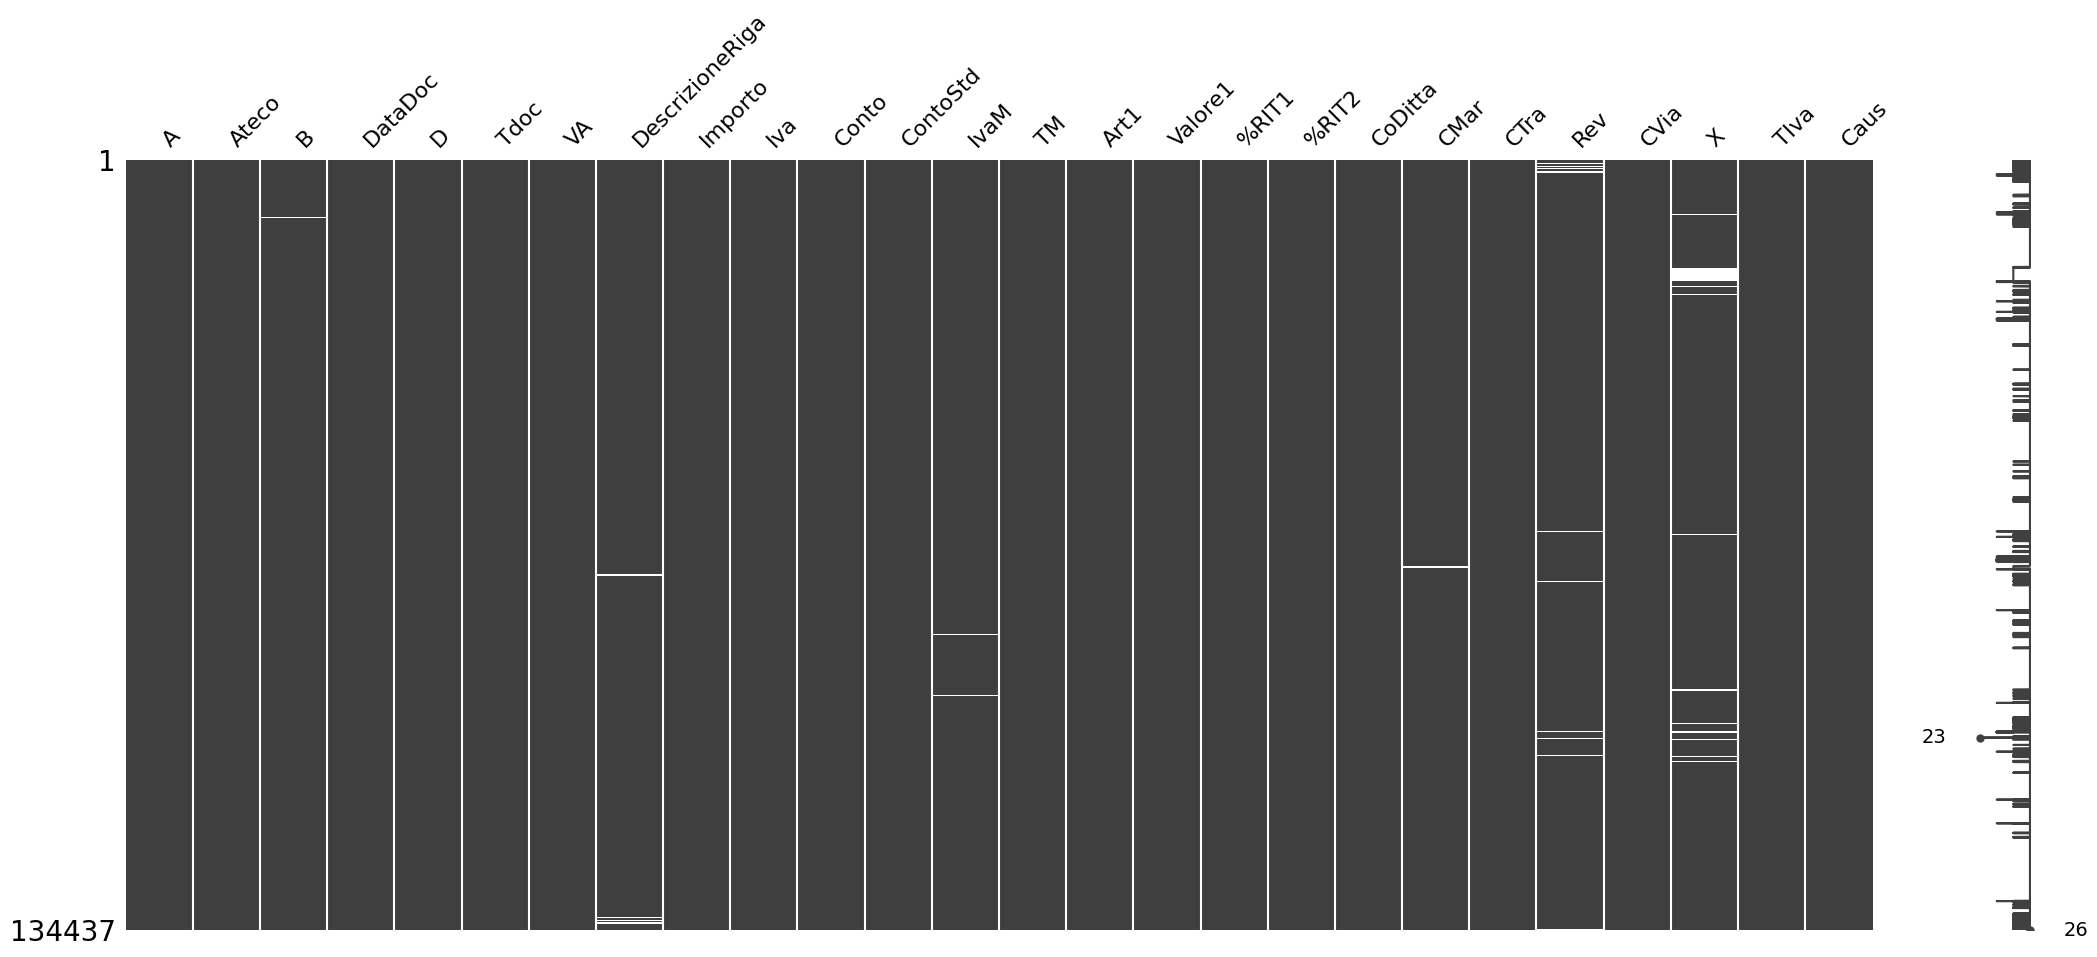

In [ ]:
# We plot the remaining missing values to visualize them in graphics
import missingno as msno
msno.matrix(df)

# This graph below allows us to see the remaining Nan all together, in fact as we can see there
# are no more dropped columns, and allow us to visualize them in an easier way;

In [ ]:
# We done a count of Missing Values of remaining columns
df.isnull().sum()

# As we can see the remaining missing values present in the several columns are
# still a number however important for our analysis, namely 8163

A                     0
Ateco                 0
B                    54
DataDoc               0
D                     1
Tdoc                  0
VA                    0
DescrizioneRiga     905
Importo               0
Iva                   0
Conto                 0
ContoStd              0
IvaM                471
TM                    0
Art1                 48
Valore1              75
%RIT1                 0
%RIT2                 0
CoDitta               0
CMar                403
CTra                 84
Rev                1657
CVia                  0
X                  4465
TIva                  0
Caus                  0
dtype: int64

In [ ]:
# We check the type of remanent variables
print(df.dtypes)

# As we can notice these are all object variables;

A                          object
Ateco                       int64
B                          object
DataDoc            datetime64[ns]
D                          object
Tdoc                       object
VA                         object
DescrizioneRiga            object
Importo                   float64
Iva                        object
Conto                       int64
ContoStd                    int64
IvaM                      float64
TM                          int64
Art1                       object
Valore1                    object
%RIT1                     float64
%RIT2                     float64
CoDitta                     int64
CMar                       object
CTra                       object
Rev                        object
CVia                       object
X                          object
TIva                        int64
Caus                        int64
dtype: object


So we display the variables that represent a small percentage of Nan; But we can notice an interesting thing, that all these columns having Nan, are categorical variables, and therefore difficult to handle from the Nan point of view; so the best solution for us is to either drop these rows having the missing values or replace these values with the observation 'Unkown' or 'Missing value'.

---
We decided to handle this columns with the drop of the rows; the columns in question are:



* **B** : Business with deferred VAT

* **D** : VAT exigibility of the document

* **DescrizioneRiga** : Description of the row (first 98 characters)

* **IvaM** : Exemption codes

*  **Art1** : Article deriving from the XML invoice. The field accepts the data type field

*  **Valore1** : Article code deriving from the XML invoice. The field accepts the value field of the XML track
*  **CMar** : Margin management type value on the accounting reason
*  **CTra** : Autotransport flag value on the accounting reason
*  **Rev** : Reverse charge reason
*   **X** : Subject to pro rata for the period prior to the invoice document date





In [ ]:
# So we decide to drop the rows that present Nan values;
# We drop rows with missing values and reassign to df
df = df.dropna()

# Display the number of missing values per column after cleaning
print("Missing values per column after cleaning:")
print(df.isnull().sum())

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

Missing values per column after cleaning:
A                  0
Ateco              0
B                  0
DataDoc            0
D                  0
Tdoc               0
VA                 0
DescrizioneRiga    0
Importo            0
Iva                0
Conto              0
ContoStd           0
IvaM               0
TM                 0
Art1               0
Valore1            0
%RIT1              0
%RIT2              0
CoDitta            0
CMar               0
CTra               0
Rev                0
CVia               0
X                  0
TIva               0
Caus               0
dtype: int64


In [ ]:
# We now have no more missing values, but we also have fewer rows of total
# observations, having removed all those that had at least one Nan.

# We now have 126,471 observations as we can see from the count
df.count()

A                  126471
Ateco              126471
B                  126471
DataDoc            126471
D                  126471
Tdoc               126471
VA                 126471
DescrizioneRiga    126471
Importo            126471
Iva                126471
Conto              126471
ContoStd           126471
IvaM               126471
TM                 126471
Art1               126471
Valore1            126471
%RIT1              126471
%RIT2              126471
CoDitta            126471
CMar               126471
CTra               126471
Rev                126471
CVia               126471
X                  126471
TIva               126471
Caus               126471
dtype: int64

## Check for duplicate rows
Now we move on to checking for duplicates, although in any case we have to be careful at this stage and choose the best strategy for conducting our analysis; we are not going to delete all duplicates, because our analysis however it is based on an accounting type dataset, each billing row can reveal important information to us; for this reason we decided to delete only the rows that are entirely the same, dropping the second one and keeping the first one.

In [ ]:
# We try to check for fully duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print("Number of fully duplicate rows:", duplicate_rows.shape[0])

# And print fully duplicate rows
print(duplicate_rows)

# Remove fully duplicate rows, keeping the first
df = df.drop_duplicates(keep='first')

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)


Number of fully duplicate rows: 17881
        A   Ateco  B    DataDoc  D  Tdoc VA  \
105     7  476220  N 2022-11-08  I  TD01  A   
117     7  476220  N 2022-11-08  I  TD01  A   
673     7  476220  N 2022-09-20  I  TD01  A   
678     7  476220  N 2022-09-20  I  TD01  A   
1363    7  476220  N 2023-04-26  I  TD01  A   
...    ..     ... ..        ... ..   ... ..   
134321  1  691010  N 2023-04-21  I  TD01  A   
134322  1  691010  N 2023-04-21  I  TD01  A   
134323  1  691010  N 2023-05-12  I  TD01  A   
134324  1  691010  N 2023-05-31  I  TD01  A   
134325  1  691010  N 2023-05-30  I  TD01  A   

                                          DescrizioneRiga  Importo   Iva  ...  \
105              BENVENUTI IN CASA MIA! TANTE RICETTE FAC    14.16  N2.2  ...   
117              BENVENUTI IN CASA MIA! TANTE RICETTE FAC    14.16  N2.2  ...   
673                            Libri ATLAS ART VISION NEW    24.31  N2.2  ...   
678                            Libri ATLAS ART VISION NEW    24.31  N2.2 

In [ ]:
# So we removed the duplicate rows from the DataFrame df, keeping only the first occurrence
# of each duplicate row. The function df.drop_duplicates(keep='first') removes the duplicate
# rows and returns a new DataFrame without the duplications.


# let's do a count of the good rows we have left for our analysis
df.count()

A                  114454
Ateco              114454
B                  114454
DataDoc            114454
D                  114454
Tdoc               114454
VA                 114454
DescrizioneRiga    114454
Importo            114454
Iva                114454
Conto              114454
ContoStd           114454
IvaM               114454
TM                 114454
Art1               114454
Valore1            114454
%RIT1              114454
%RIT2              114454
CoDitta            114454
CMar               114454
CTra               114454
Rev                114454
CVia               114454
X                  114454
TIva               114454
Caus               114454
dtype: int64

In [ ]:
df.shape

(114454, 26)

So completing the preprocess and cleanup of our dataset we get 114454 rows and 26 columns, which we can use to continue the study and subsequent implementation of our model.







---



# 3) EDA: Exploring features of the dataset

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

* EDA can be leveraged to check for outliers, patterns, and trends in the given data.
* EDA helps to find meaningful patterns in data.
*   EDA provides in-depth insights into the data sets to solve our business problems.




As a reminder of what kind of numerical variables we are talking about here, I am going to list below all specific meaning for each of these
So the columns in question are:

* **Ateco** : Ateco code

* **DataDoc** : Document date

* **Importo** : Amount of the row


*   **Conto** : Account resulting from mapping
*   **ContoStd** : Related standard account



* **IvaM** : Exemption codes (table to follow)

*  **TM** : Mapping type (table to follow)

*  **%RIT1** : % first advance withholding
*  **%RIT2** : % second advance withholding
*  **CoDitta** : Company code ts-studio
*  **TIva** : VAT type on the reason
*   **Caus** : Possible standard causal code (VAT type if the standard causal code is absent).

In [ ]:
# Provide a statistics summary of data belonging to numerical datatype such as
# int, float
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Ateco,114454.0,471253.395207,11110.0,432101.0,471920.0,479110.0,960909.0,176775.090611
DataDoc,114454,2022-05-30 09:55:22.075243776,2020-01-09 00:00:00,2021-08-24 00:00:00,2022-08-03 00:00:00,2023-03-15 00:00:00,2023-09-29 00:00:00,NaN
Importo,114454.0,1021.717953,-459751.5,10.2,40.0,250.5525,4000000.0,18783.628764
Conto,114454.0,5780148.732583,60031.0,5805125.0,5810005.0,6625006.0,9999009.0,1446112.709068
ContoStd,114454.0,5780017.033848,60031.0,5805010.0,5810005.0,6625005.0,9515090.0,1446111.787957
IvaM,114454.0,318.562243,2.0,312.0,324.0,374.0,722.0,80.021175
TM,114454.0,5.488415,3.0,3.0,4.0,7.0,20.0,2.887295
%RIT1,114454.0,0.246966,0.0,0.0,0.0,0.0,100.0,2.23982
%RIT2,114454.0,0.001355,0.0,0.0,0.0,0.0,9.19,0.108078
CoDitta,114454.0,1054.876702,1.0,59.0,187.0,560.0,9311.0,2242.58264


In [ ]:
# Before we do EDA, lets separate Numerical and categorical variables for easy analysis
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['A', 'B', 'D', 'Tdoc', 'VA', 'DescrizioneRiga', 'Iva', 'Art1',
       'Valore1', 'CMar', 'CTra', 'Rev', 'CVia', 'X'],
      dtype='object')
Numerical Variables:
['Ateco', 'Importo', 'Conto', 'ContoStd', 'IvaM', 'TM', '%RIT1', '%RIT2', 'CoDitta', 'TIva', 'Caus']


# Check and manage outliers:

In this section, we address the identification and management of outliers. Outliers can significantly impact our analysis and results. However, as this is a project and we cannot verify the correctness of each observation, we prefer to retain the outliers. The only exceptions are specific variables that we can safely modify to stay within defined ranges.

Numerical Variables: ['Ateco', 'Importo', 'Conto', 'ContoStd', 'IvaM', 'TM', '%RIT1', '%RIT2', 'CoDitta', 'TIva', 'Caus']


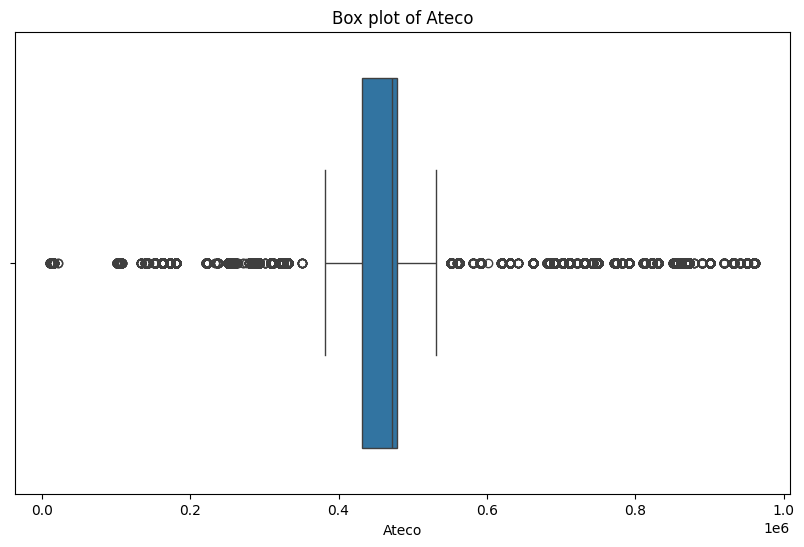

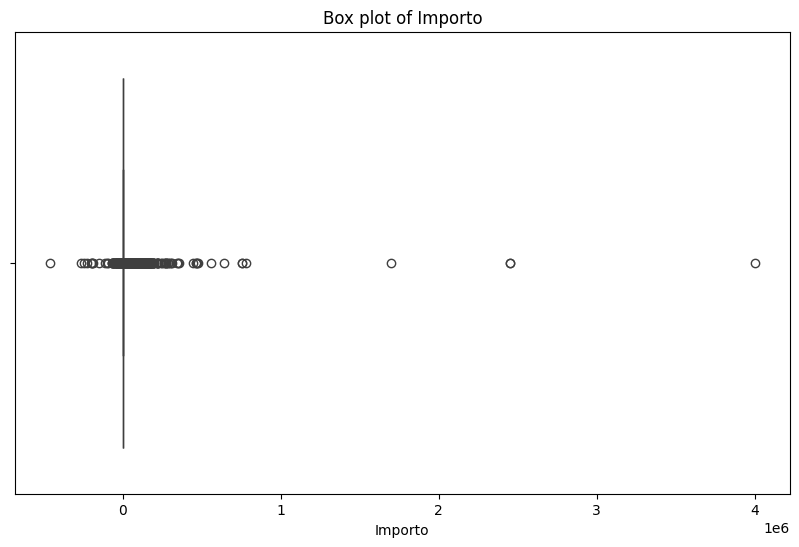

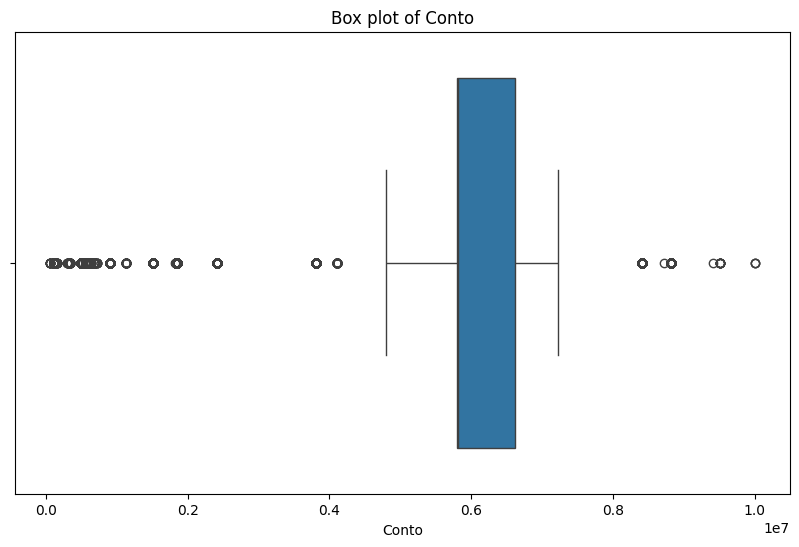

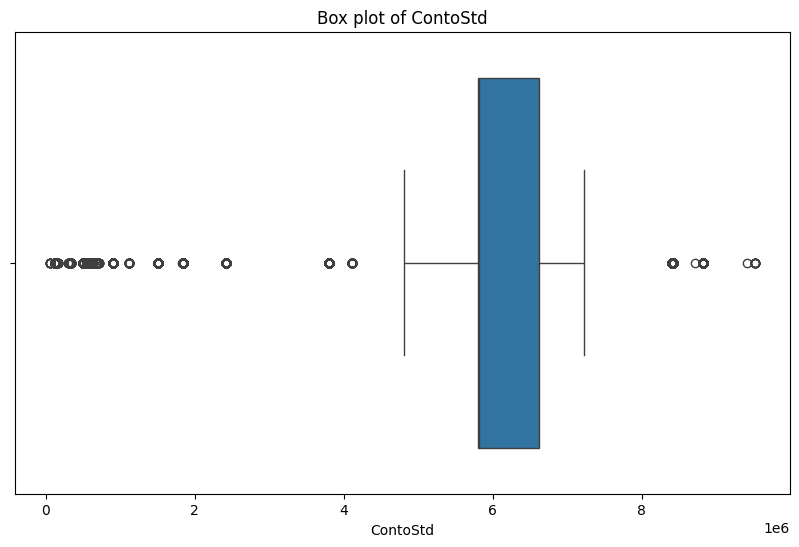

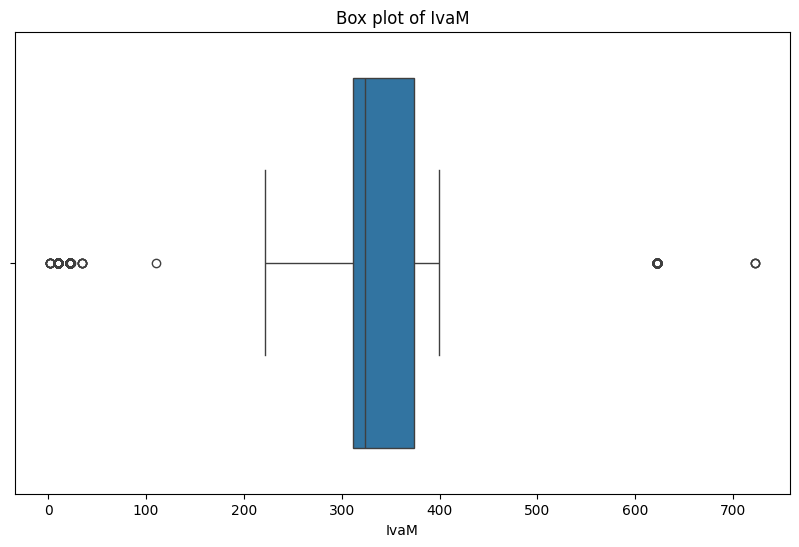

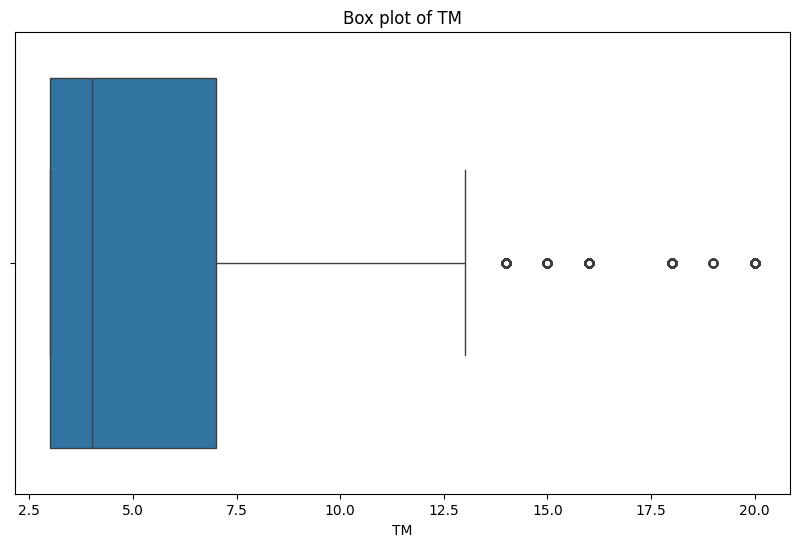

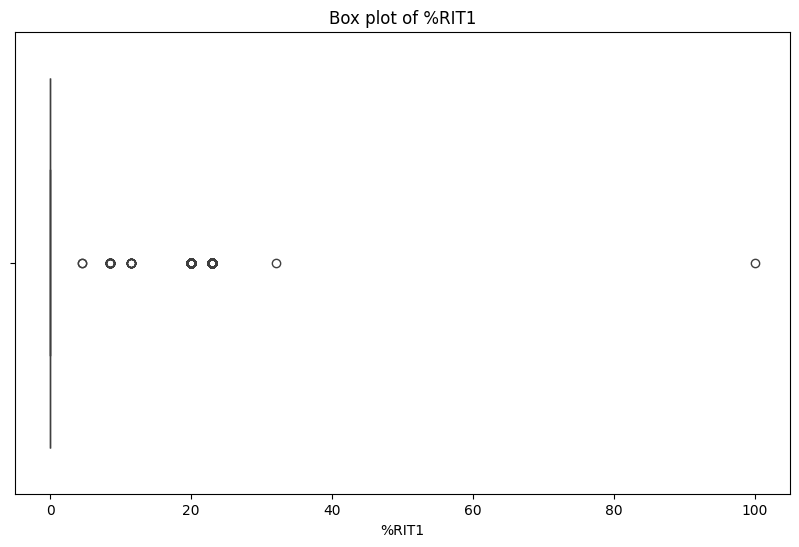

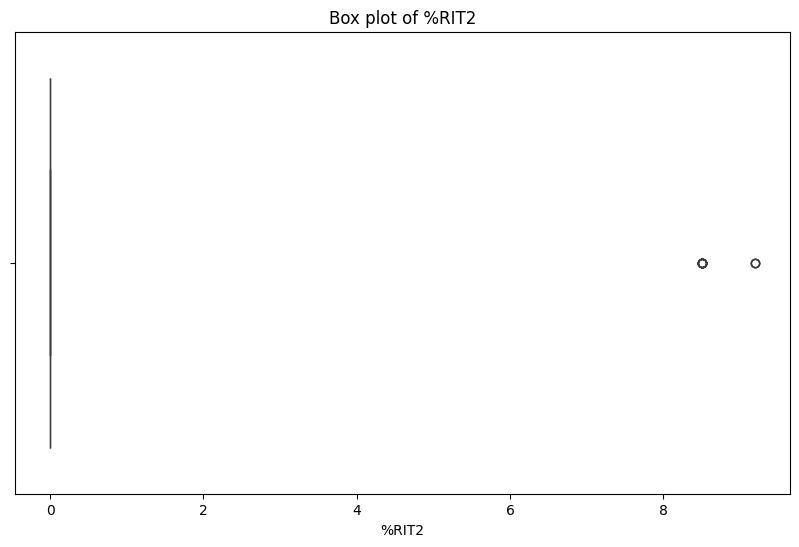

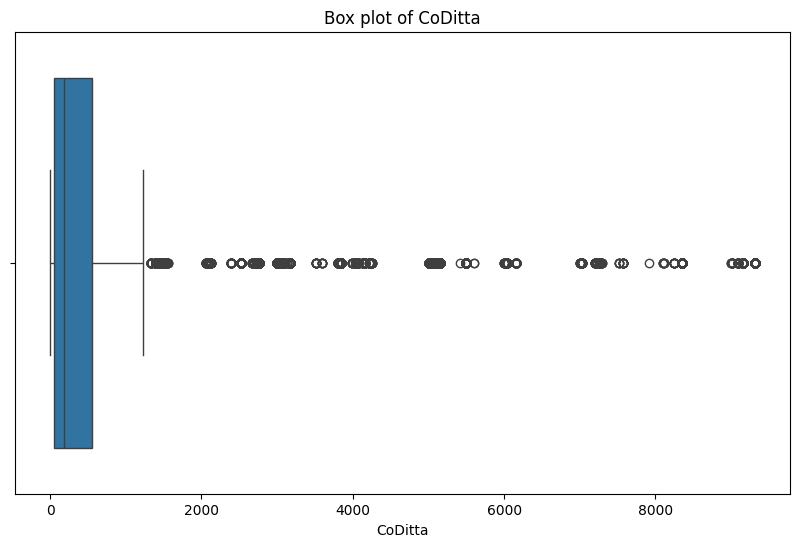

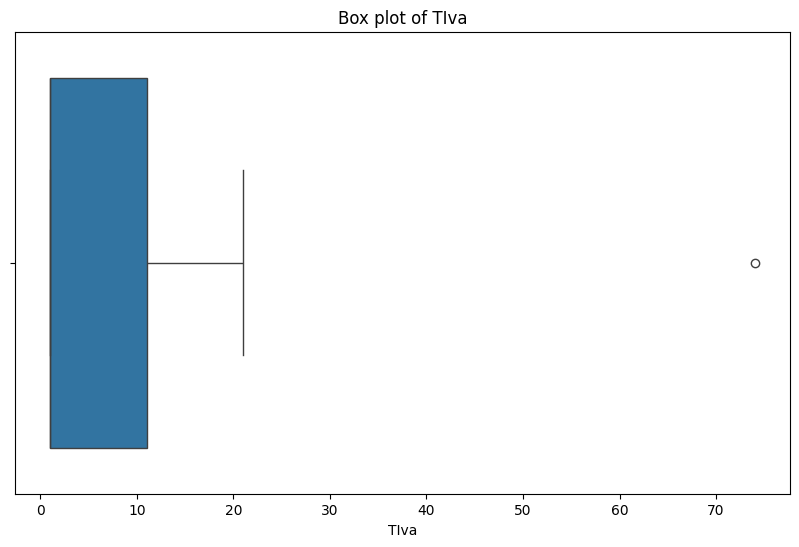

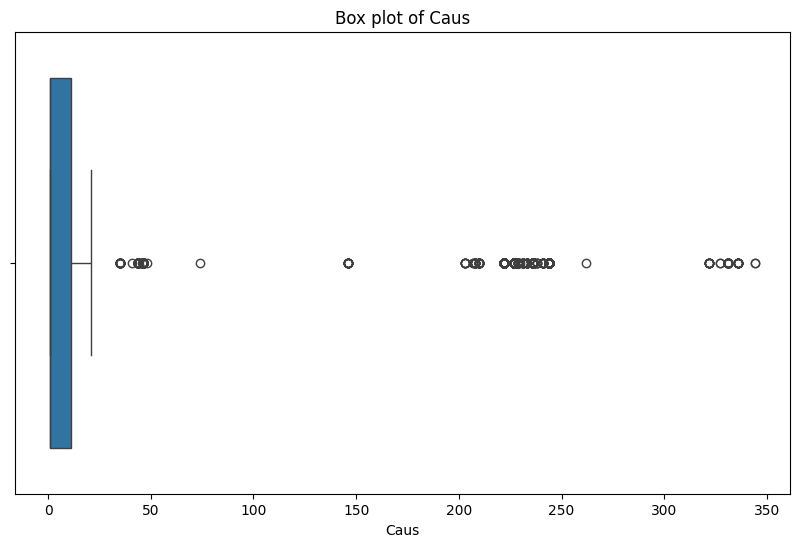

Number of outliers detected: 73888
        A   Ateco  B    DataDoc  D  Tdoc VA  \
2240    7  133000  N 2021-10-20  I  TD01  A   
2241    7  133000  N 2021-12-03  I  TD02  A   
2242    7  133000  N 2022-01-17  I  TD24  A   
2243    7  133000  N 2022-05-31  I  TD01  A   
2244    7  133000  N 2022-05-31  I  TD01  A   
...    ..     ... ..        ... ..   ... ..   
131622  7  452010  N 2022-05-24  I  TD01  A   
131623  7  452010  N 2022-05-24  I  TD01  A   
131624  7  452010  N 2022-05-24  I  TD01  A   
131625  7  452010  N 2022-08-19  I  TD01  A   
131626  7  452010  N 2022-08-19  I  TD01  A   

                                          DescrizioneRiga   Importo   Iva  \
2240    Rimborso Oneri Camerali // Rimborso Oneri e Di...    500.00    N1   
2241    CAPARRA CONFIRMATORIA -35 DEL VALORE MACCHINA ...  66500.00    N1   
2242    STORNO CAPARRA CONFIRMATORIA RIF. FATTURA N. 2... -66500.00    N1   
2243                       CONTROLLO PER.PORTA 1 BATTENTE      8.00  N6.7   
2244           

In [ ]:
# We have to identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:", num_cols)

# Going on we visualize outliers using box plots
for column in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# And detect outliers using the IQR method
outliers = pd.DataFrame()

for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers = pd.concat([outliers, outliers_in_column])

outliers = outliers.drop_duplicates()
print(f"Number of outliers detected: {outliers.shape[0]}")

# Finally we print and inspect the outliers
print(outliers)



---

For example of IvaM we know that the values range from 300
to 382, so the values
above and below this given range are definitely invalid, so the only
variables that have pre-established limits for which outliers can be
misleading are only IvaM and TM, but TM presenting only values within its
range does not cause us any problems, the only one that needs to be changed is IvaM.

In [ ]:
# We define the valid range for IvaM
valid_range_min = 300
valid_range_max = 382

# And filter out the rows where IvaM is outside the valid range
df_filtered = df[(df['IvaM'] >= valid_range_min) & (df['IvaM'] <= valid_range_max)]

# We save the cleaned dataset to CSV file
df_filtered.to_csv('cleaned_dataset.csv', index=False)

# Display the shape of the new dataframe and first few rows
print(df_filtered.shape)
df_filtered.head()


(107563, 26)


,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
12,7,476220,N,2022-08-08,I,TD01,A,GET THINKING. STUDENT'S BOOK AND WORKBOO,25.35,N2.2,...,0.0,0.0,533,N,N,N,N,N,11,11
13,7,476220,N,2022-08-08,I,TD01,A,SUCCEDE SEMPRE QUALCOSA DI MERAVIGLIOSO,13.51,N2.2,...,0.0,0.0,533,N,N,N,N,N,11,11
14,7,476220,N,2022-08-08,I,TD01,A,MATEMATICA.ROSSO PER LE SCUOLE SUPERIOR,29.09,N2.2,...,0.0,0.0,533,N,N,N,N,N,11,11
15,7,476220,N,2022-08-08,I,TD01,A,IT ENDS WITH US,11.31,N2.2,...,0.0,0.0,533,N,N,N,N,N,11,11
16,7,476220,N,2022-08-08,I,TD01,A,PIETRE PARLANO 2 CORSO DI STORIA,46.72,N2.2,...,0.0,0.0,533,N,N,N,N,N,11,11


In [ ]:
# We display again the summary of statistical features to see how it changed for IvaM
df_filtered.describe().T

,count,mean,min,25%,50%,75%,max,std
Ateco,107563.0,469547.843757,11110.0,432101.0,475910.0,479110.0,960909.0,178853.582888
DataDoc,107563,2022-05-23 11:27:28.503667200,2020-01-09 00:00:00,2021-07-30 00:00:00,2022-07-31 00:00:00,2023-03-13 00:00:00,2023-09-29 00:00:00,NaN
Importo,107563.0,647.95441,-459751.5,10.0,35.31,214.29,2451400.0,12470.49729
Conto,107563.0,5742161.226676,60031.0,5805125.0,5810005.0,6625005.0,9999009.0,1445813.41572
ContoStd,107563.0,5742065.994998,60031.0,5805010.0,5810005.0,6625005.0,9515090.0,1445768.258958
IvaM,107563.0,336.956388,300.0,315.0,324.0,374.0,381.0,28.788598
TM,107563.0,5.475638,3.0,3.0,4.0,7.0,20.0,2.92773
%RIT1,107563.0,0.262787,0.0,0.0,0.0,0.0,100.0,2.309554
%RIT2,107563.0,0.001442,0.0,0.0,0.0,0.0,9.19,0.111486
CoDitta,107563.0,1083.67883,1.0,59.0,187.0,622.0,9311.0,2282.631451


##Univariate Analysis

Analyzing/visualizing the dataset by taking one variable at a time:
Data visualization is essential; we must decide what charts to plot to better understand the data.
Univariate analysis can be done for both Categorical and Numerical variables.

* **Categorical variables** can be visualized using a Count plot, Bar Chart, Pie Plot.
* **Numerical Variables** can be visualized using Histogram, Box Plot, Density Plot.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

Ateco
Skew : 0.47


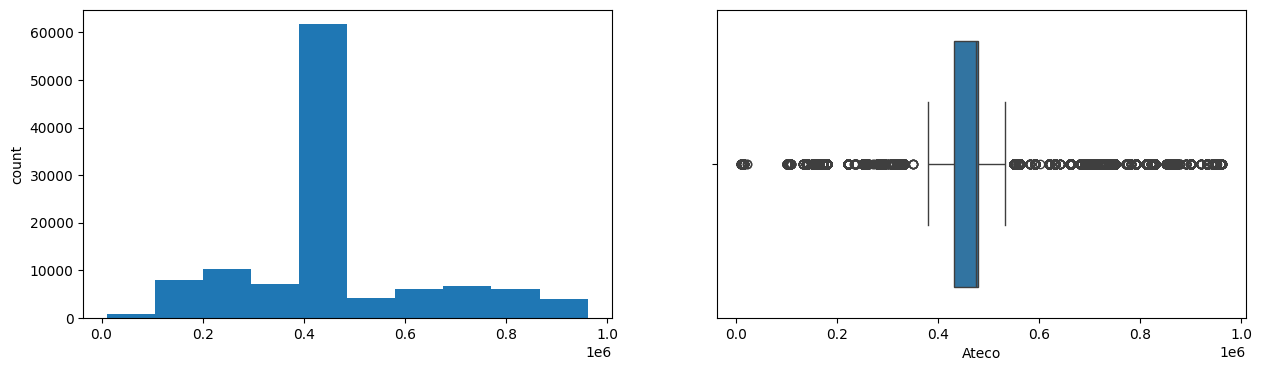

Importo
Skew : 148.45


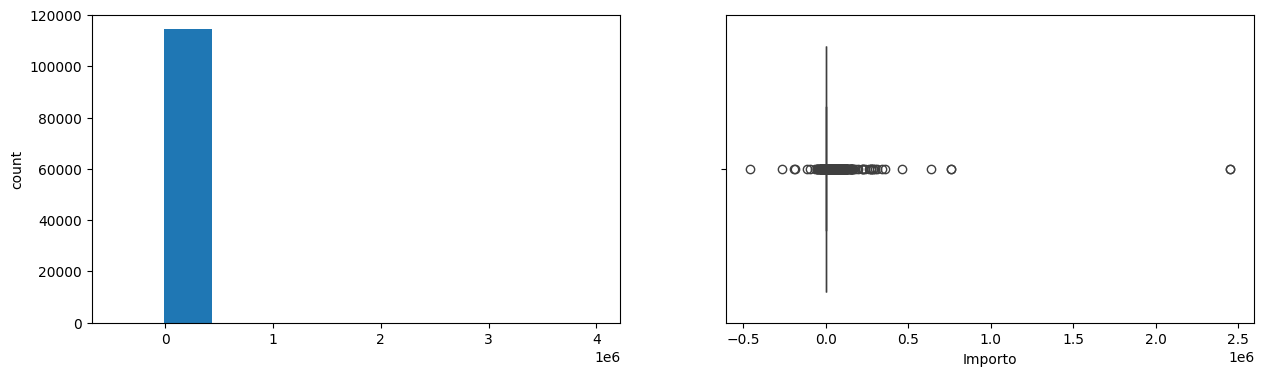

Conto
Skew : -2.11


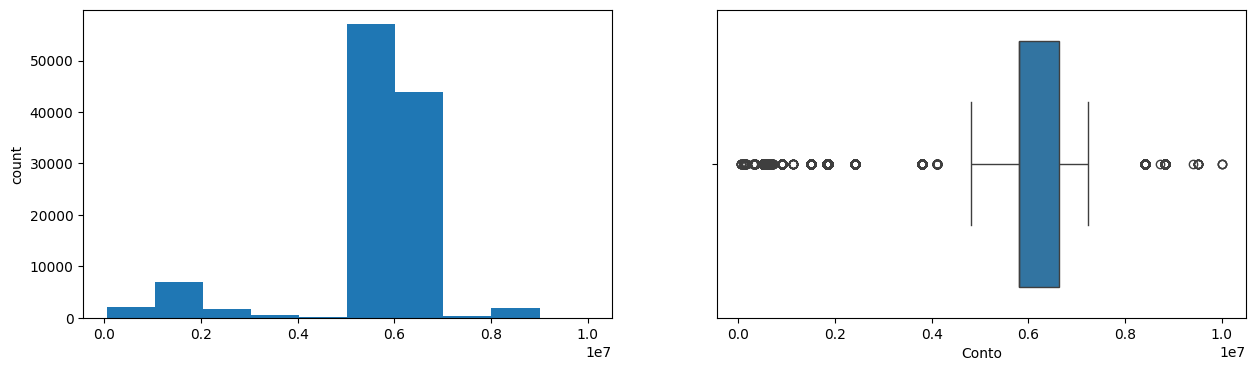

ContoStd
Skew : -2.11


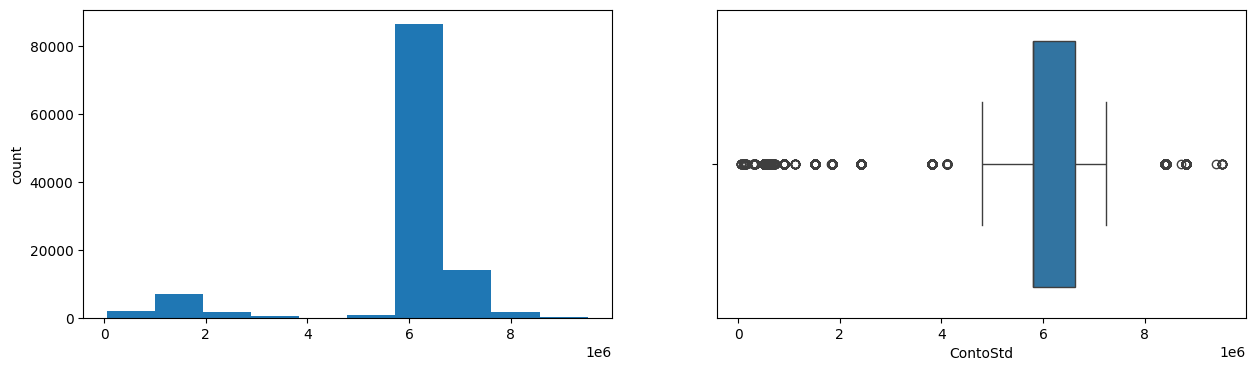

IvaM
Skew : 0.47


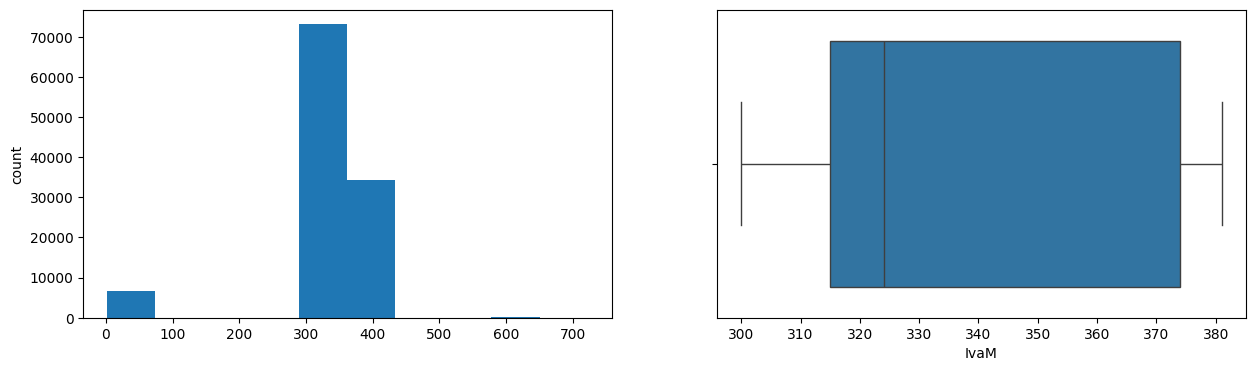

TM
Skew : 1.51


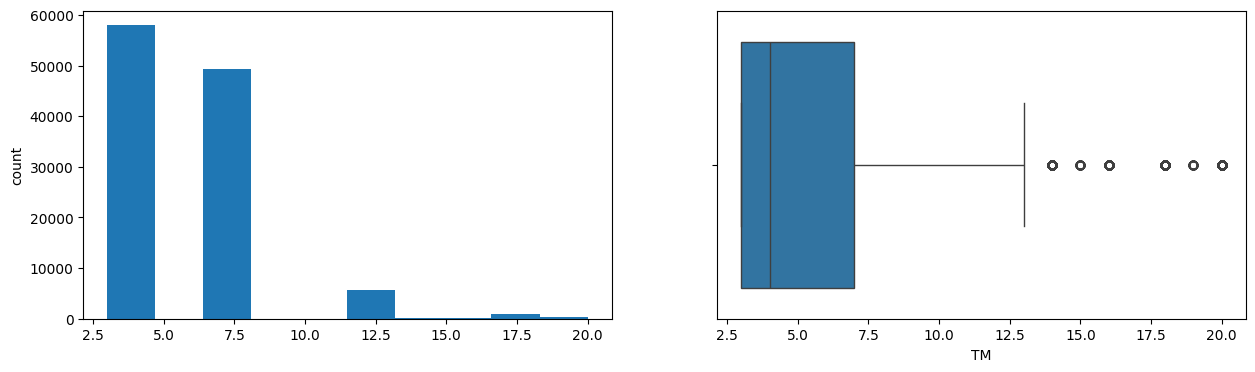

%RIT1
Skew : 9.21


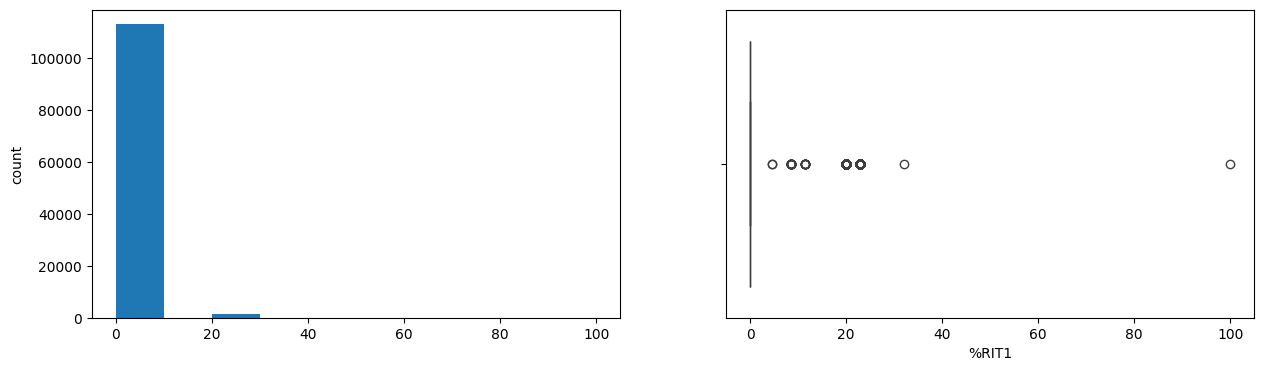

%RIT2
Skew : 77.39


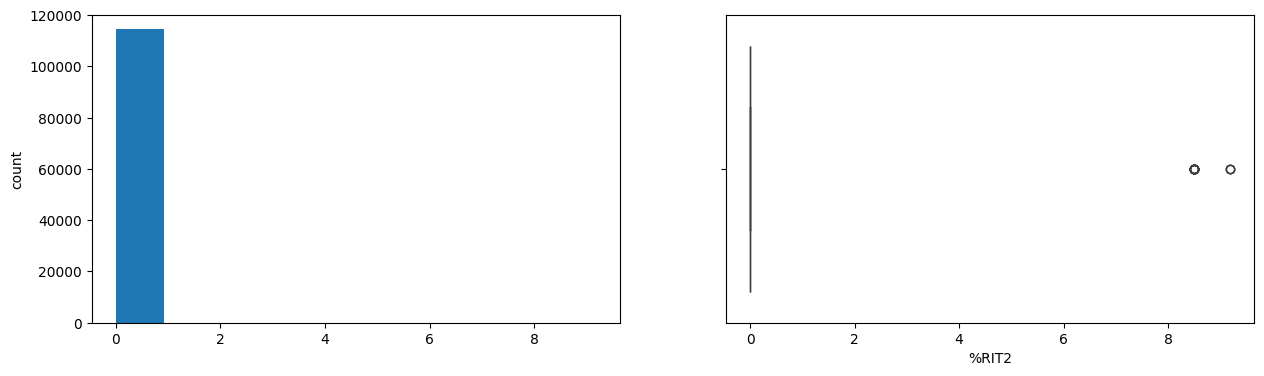

CoDitta
Skew : 2.59


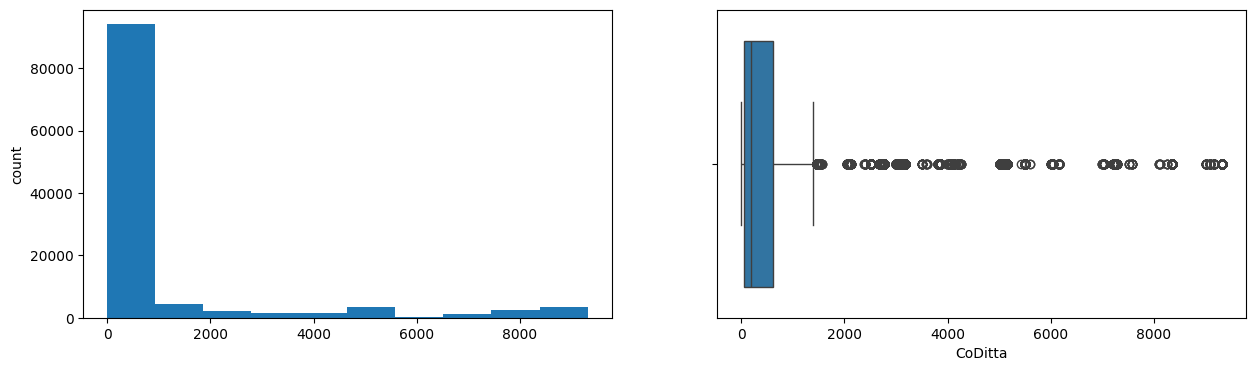

TIva
Skew : 0.36


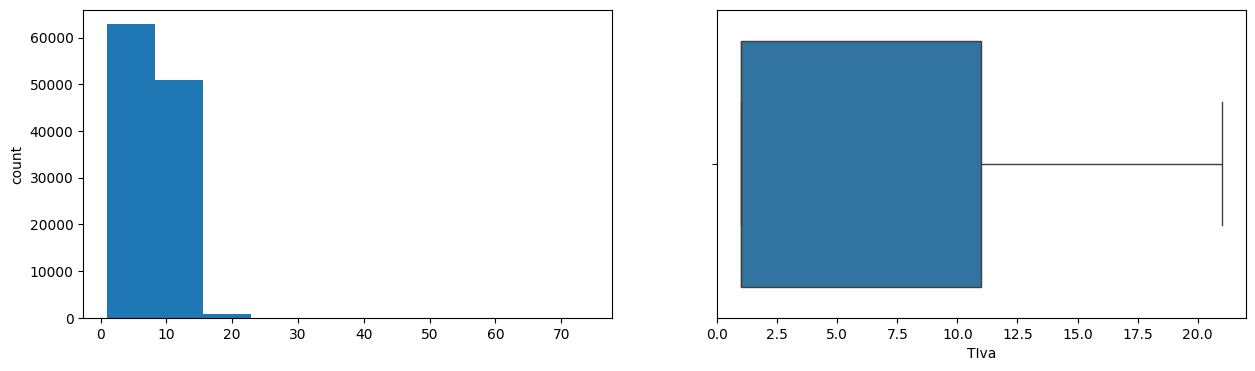

Caus
Skew : 14.33


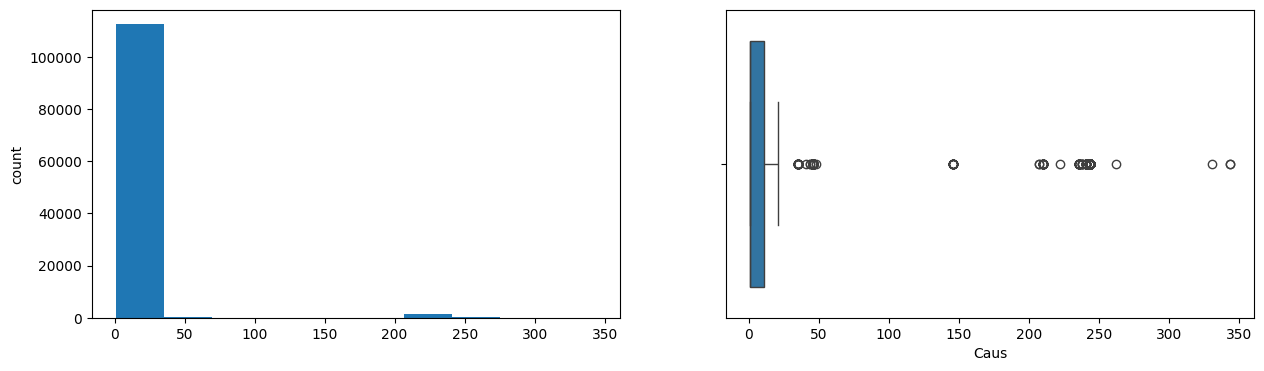

In [ ]:
# In the below figure, a histogram and box plot is used to show the pattern of the variables,
# as some variables have skewness and outliers.
for col in num_cols:
    print(col)
    print('Skew :', round(df_filtered[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_filtered[col])
    plt.show()




---





Categorical variables are being visualized using a count plot.

Categorical variables provide the pattern of factors influencing our objective 'Ivam'.

Below we then analyzed the first set of categorical variables:

*   **A** : Business type
*   **B** : Business with deferred VAT
*   **D** : VAT exigibility of the document
*   **Tdoc** : Document Type
*   **VA** : Document type sales (V) or purchases (A)
*   **DescrizioneRiga** : Description of the row (first 98 characters)
*   **Iva** : Nature or VAT rate applied
*   **Art1** : Article deriving from the XML invoice. The field accepts the data type field











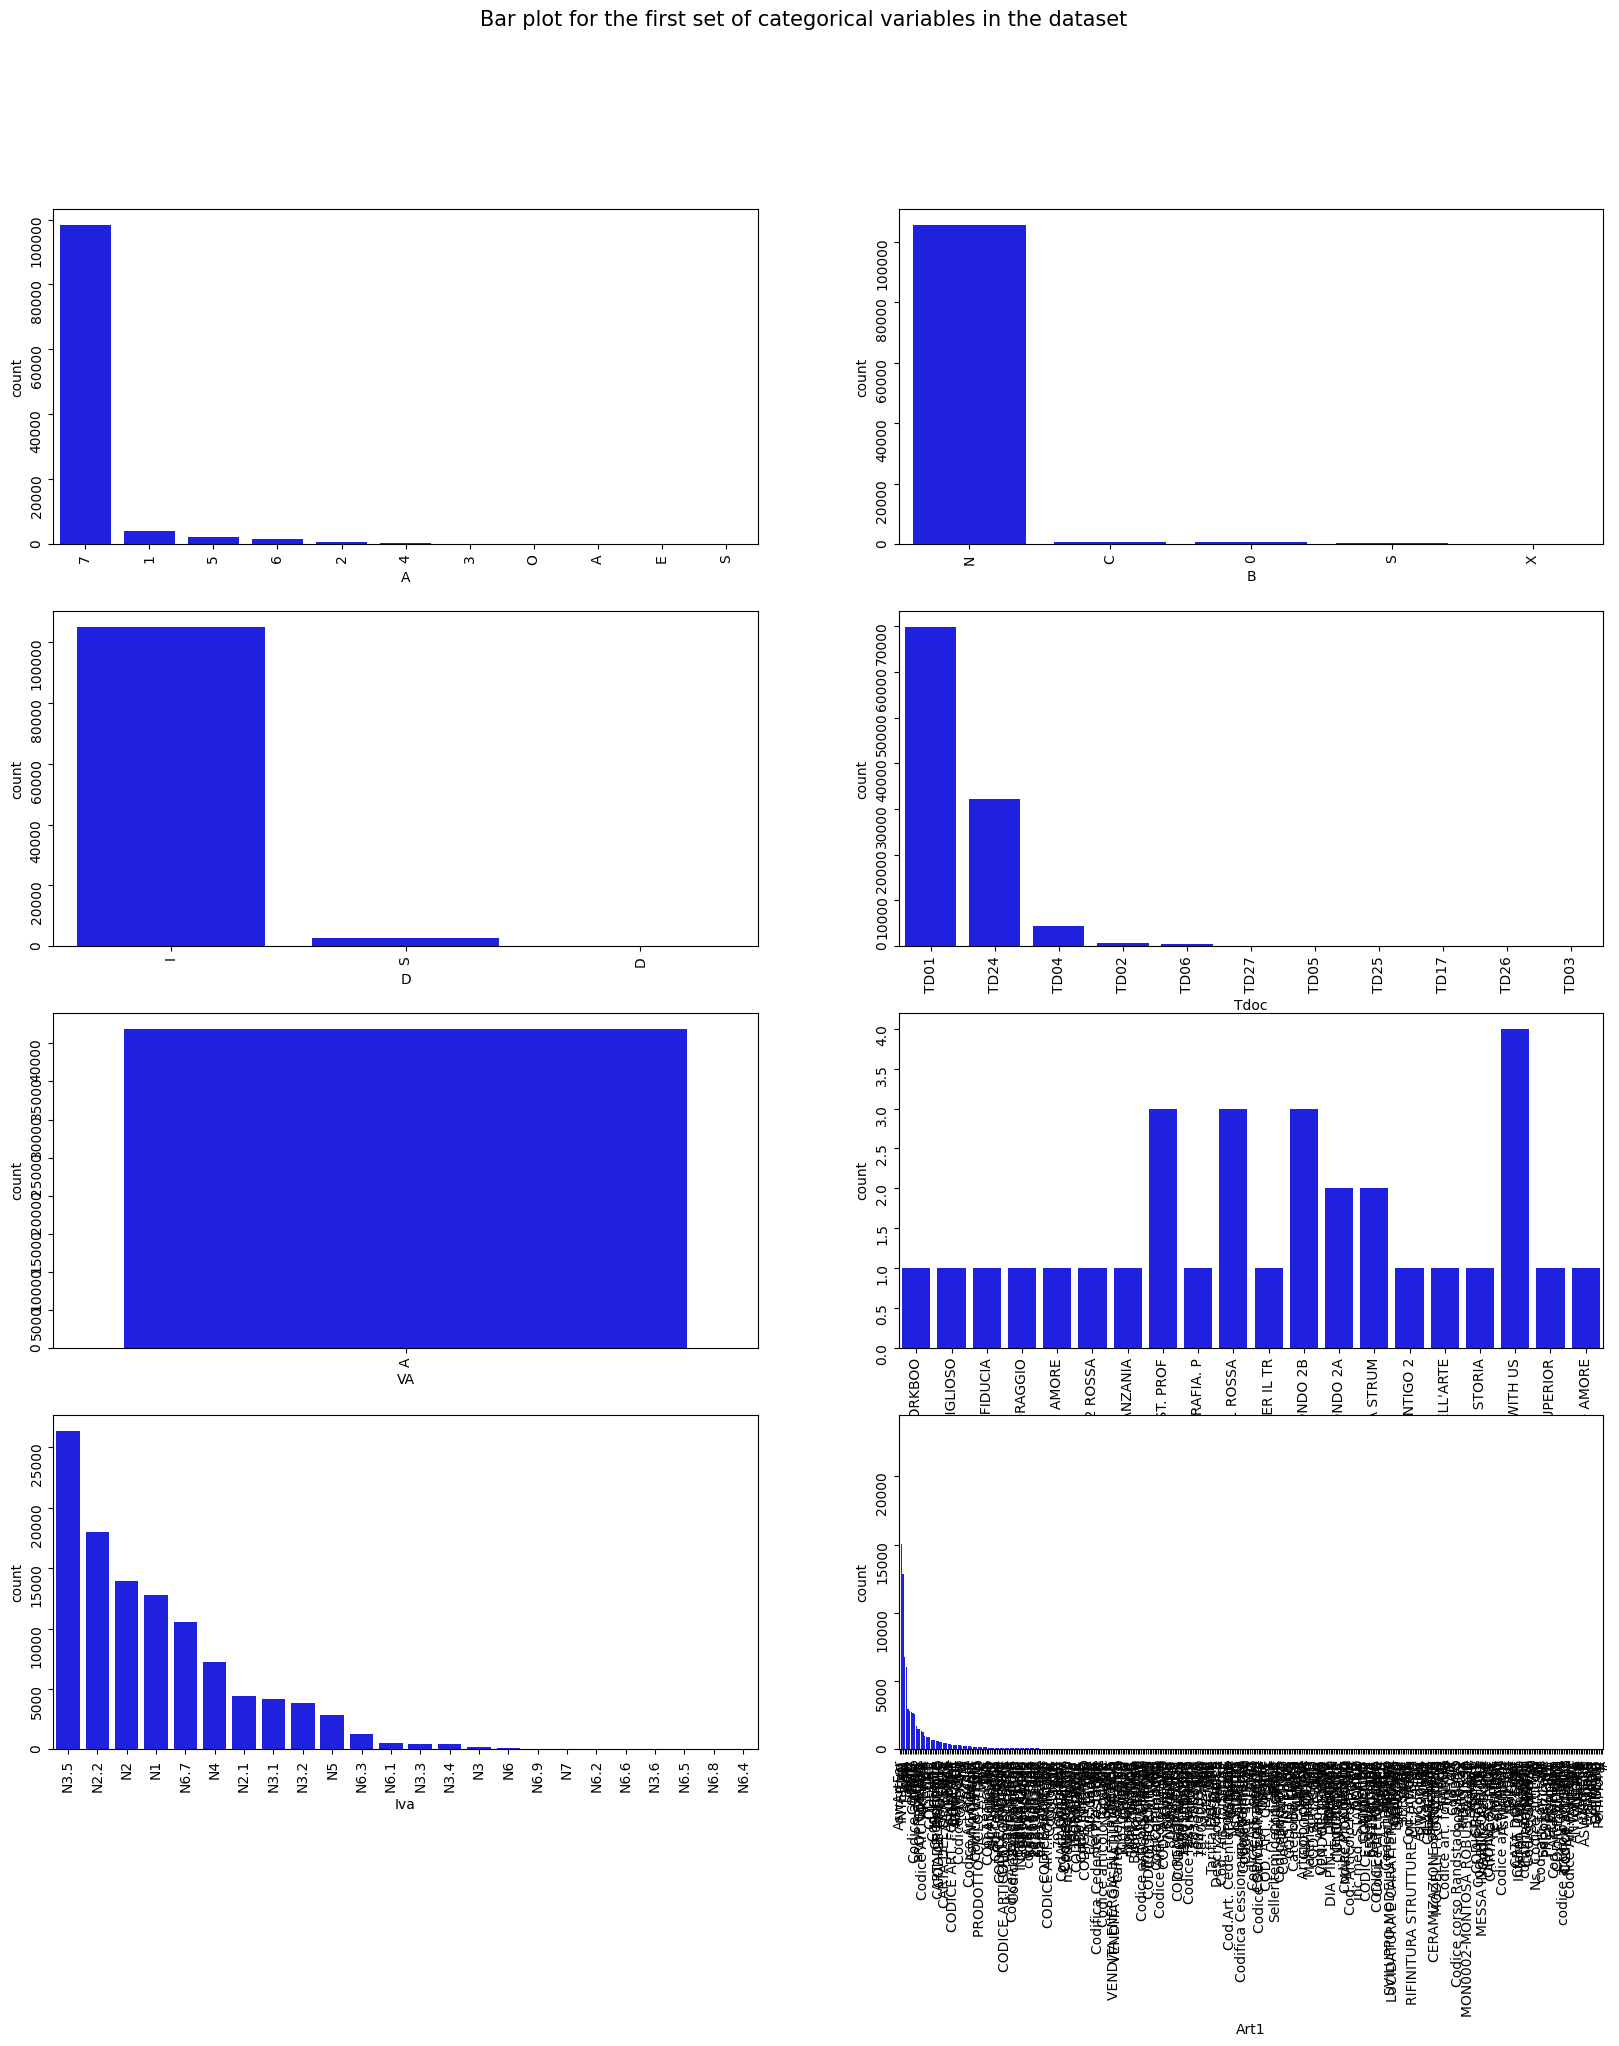

In [ ]:
# We create bar plots for the first set of categorical variables
fig, axes = plt.subplots(4,2, figsize = (20, 20))
fig.suptitle('Bar plot for the first set of categorical variables in the dataset', fontsize=15)
for row in axes:
    for ax in row:
        ax.tick_params(labelrotation=90, labelsize=10)
sns.countplot(ax = axes[0, 0], x = 'A', data = df_filtered, color = 'blue',
              order = df_filtered['A'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'B', data = df_filtered, color = 'blue',
              order = df_filtered['B'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'D', data = df_filtered, color = 'blue',
              order = df_filtered['D'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Tdoc', data = df_filtered, color = 'blue',
              order = df_filtered['Tdoc'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'VA', data = df_filtered, color = 'blue',
              order = df_filtered['VA'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'DescrizioneRiga', data = df_filtered, color = 'blue',
              order = df_filtered['DescrizioneRiga'].head(20).value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'Iva', data = df_filtered, color = 'blue',
              order = df_filtered['Iva'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'Art1', data = df_filtered, color = 'blue',
              order = df_filtered['Art1'].value_counts().index);
plt.show()

And below we also analyzed the second set of categorical variables:

*   **CMar** : Margin management type value on the accounting reason
*   **CTra** : Autotransport flag value on the accounting reason
*   **Rev** : Reverse charge reason
*   **CVia** : Travel agency reason
*   **X** : Subject to pro rata for the period prior to the invoice document date


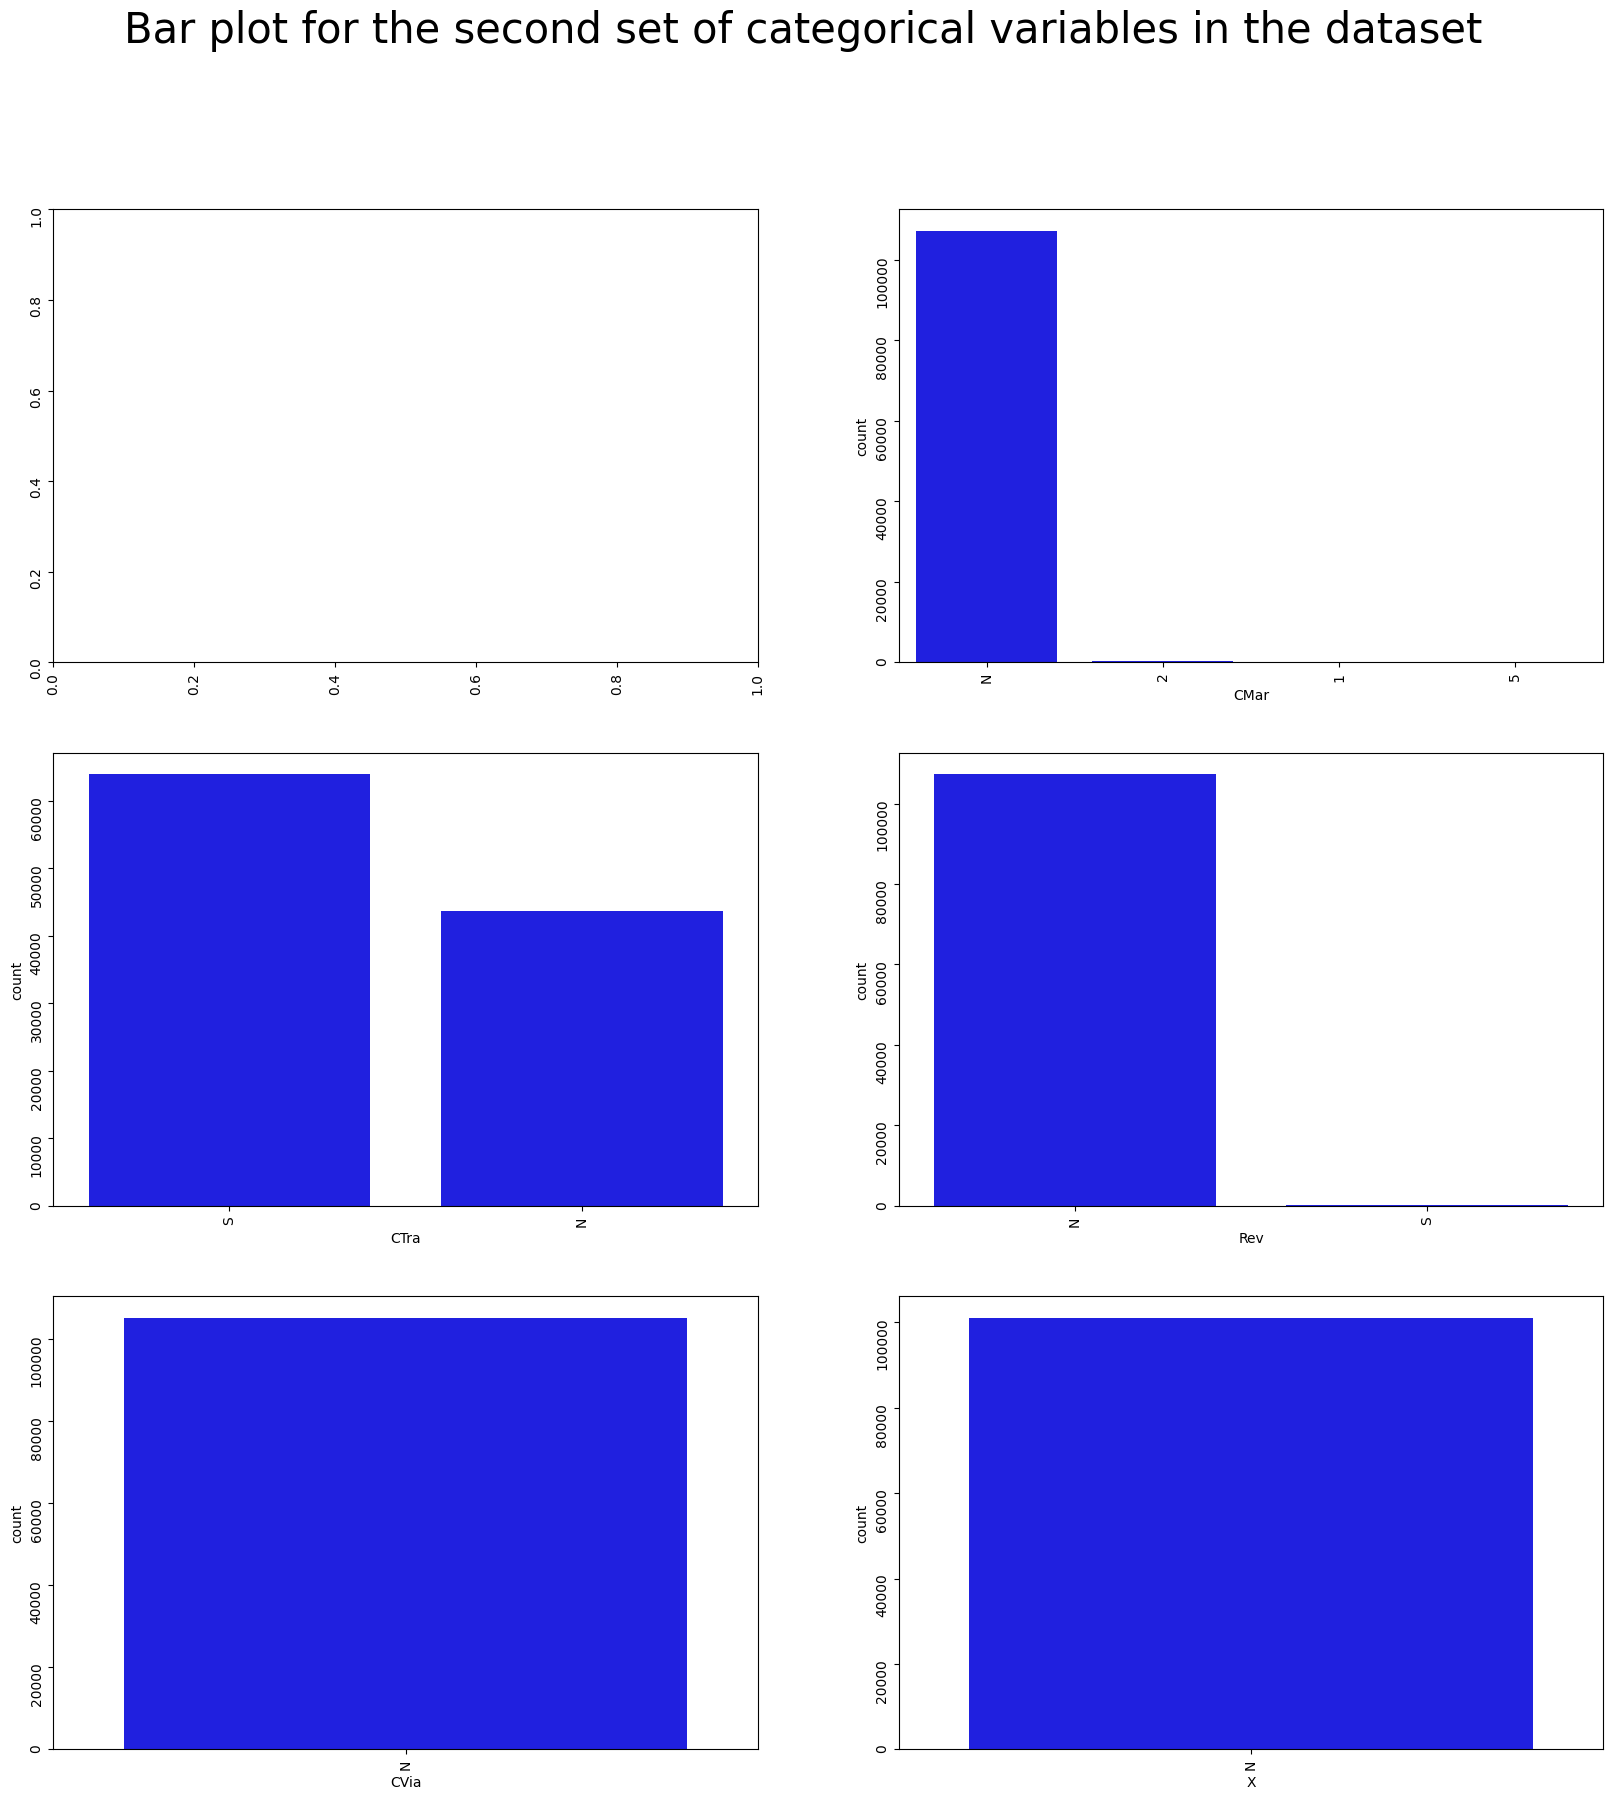

In [ ]:
# We creating a subplot structure
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('Bar plot for the second set of categorical variables in the dataset', fontsize=30)

# And setting up individual plots
sns.countplot(ax=axes[0, 1], x='CMar', data=df_filtered, color='blue', order=df_filtered['CMar'].value_counts().index)
sns.countplot(ax=axes[1, 0], x='CTra', data=df_filtered, color='blue', order=df_filtered['CTra'].value_counts().index)
sns.countplot(ax=axes[1, 1], x='Rev', data=df_filtered, color='blue', order=df_filtered['Rev'].value_counts().index)
sns.countplot(ax=axes[2, 0], x='CVia', data=df_filtered, color='blue', order=df_filtered['CVia'].head(20).value_counts().index)
sns.countplot(ax=axes[2, 1], x='X', data=df_filtered, color='blue', order=df_filtered['X'].head(20).value_counts().index)

# Finally adjusting tick parameters after plotting to ensure they apply to all subplots
for row in axes:
    for ax in row:
        ax.tick_params(labelrotation=90, labelsize=10)

plt.show()

In [ ]:
# We select only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_filtered_numerical = df[numerical_columns]

# To calculate the correlation matrix
correlation_matrix = df_filtered_numerical.corr()

# And display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Ateco   Importo     Conto  ContoStd      IvaM        TM  \
Ateco     1.000000  0.002935 -0.122161 -0.122105 -0.056395  0.221839   
Importo   0.002935  1.000000 -0.002690 -0.002697 -0.074416  0.016085   
Conto    -0.122161 -0.002690  1.000000  0.999904 -0.013376 -0.031176   
ContoStd -0.122105 -0.002697  0.999904  1.000000 -0.013253 -0.031166   
IvaM     -0.056395 -0.074416 -0.013376 -0.013253  1.000000 -0.037457   
TM        0.221839  0.016085 -0.031176 -0.031166 -0.037457  1.000000   
%RIT1     0.115949 -0.000864 -0.023720 -0.023727 -0.009582  0.048522   
%RIT2     0.004849  0.003110  0.001524  0.001524 -0.000156 -0.004861   
CoDitta  -0.060167  0.021961  0.052131  0.052192  0.028125  0.029639   
TIva      0.155269 -0.001165  0.336161  0.336151 -0.305430 -0.081374   
Caus      0.048409  0.023705  0.125231  0.125125 -0.368025 -0.025679   

             %RIT1     %RIT2   CoDitta      TIva      Caus  
Ateco     0.115949  0.004849 -0.060167  0.155269  0.04

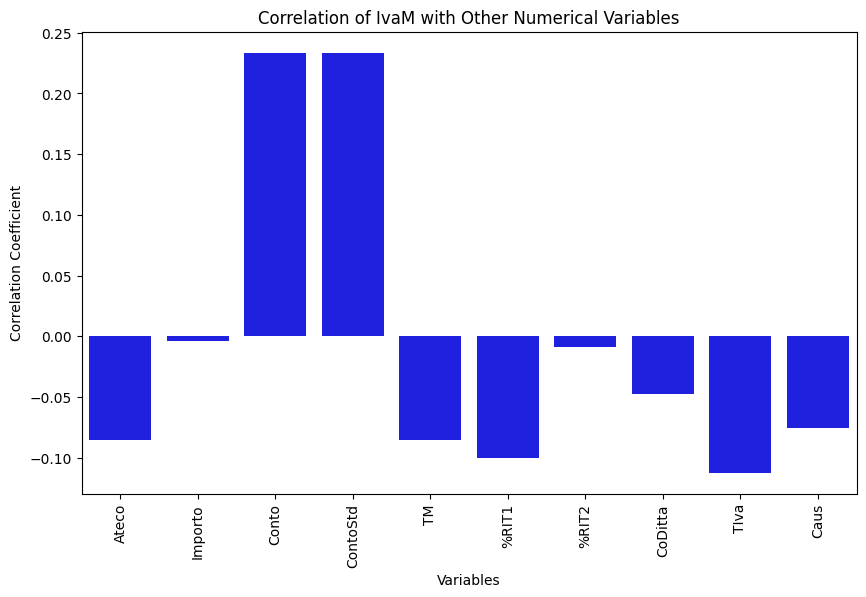

In [ ]:
# Calculation of correlations as already done previously
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns
correlation_with_IvaM = df_filtered[numerical_columns].corr()['IvaM'].drop('IvaM')

# Visualization of correlation with a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_IvaM.index, y=correlation_with_IvaM.values, color='blue')  # Uso di un colore fisso
plt.title('Correlation of IvaM with Other Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()



## Multivariate analysis
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.


*   A heat map is widely been used for Multivariate Analysis.

*  Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

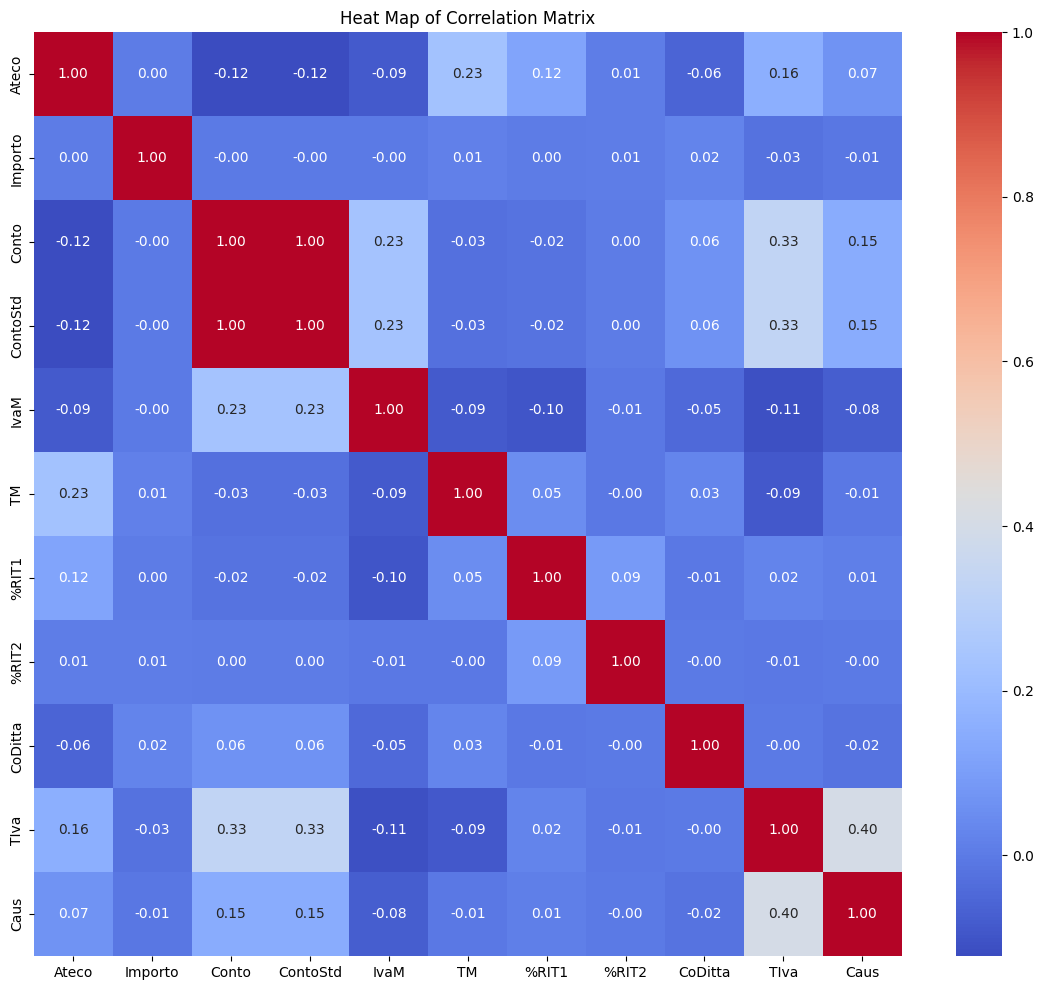

In [ ]:
# Select only the numerical columns
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df_filtered[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heat map
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heat Map of Correlation Matrix')
plt.show()


# 4) Encoding and Nomralization

I implement the encoding and normalization process to prepare the dataset for the model



In [ ]:
df = pd.read_csv('cleaned_dataset.csv')

<ipython-input-38-a300ac5730a0>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_dataset.csv')


In [ ]:
# Identifies non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

In [ ]:
# Convert all non-numeric columns to strings
df[non_numeric_columns] = df[non_numeric_columns].astype(str)


In [ ]:
# Initialize the ordinal encoder
encoder = OrdinalEncoder()


In [ ]:
# Encode non-numeric columns
df[non_numeric_columns] = encoder.fit_transform(df[non_numeric_columns])

In [ ]:
# Initialize the Min-Max normalizer
scaler = MinMaxScaler()

# Apply Min-Max normalization to the data, Now df_normalized contains the normalized data
df_normalized = scaler.fit_transform(df)


In [ ]:
# Convert the normalized array to a pandas dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [ ]:
# Display the first rows of the normalized DataFrame
print(df_normalized.head())


     A     Ateco    B   DataDoc    D  Tdoc   VA  DescrizioneRiga   Importo  \
0  0.6  0.489693  0.5  0.619981  0.5   0.0  0.0         0.420180  0.157936   
1  0.6  0.489693  0.5  0.619981  0.5   0.0  0.0         0.835278  0.157932   
2  0.6  0.489693  0.5  0.619981  0.5   0.0  0.0         0.555522  0.157938   
3  0.6  0.489693  0.5  0.619981  0.5   0.0  0.0         0.469779  0.157932   
4  0.6  0.489693  0.5  0.619981  0.5   0.0  0.0         0.683295  0.157944   

        Iva  ...  %RIT1  %RIT2   CoDitta  CMar  CTra  Rev  CVia    X  TIva  \
0  0.130435  ...    0.0    0.0  0.057143   1.0   0.0  0.0   0.0  0.5   0.5   
1  0.130435  ...    0.0    0.0  0.057143   1.0   0.0  0.0   0.0  0.5   0.5   
2  0.130435  ...    0.0    0.0  0.057143   1.0   0.0  0.0   0.0  0.5   0.5   
3  0.130435  ...    0.0    0.0  0.057143   1.0   0.0  0.0   0.0  0.5   0.5   
4  0.130435  ...    0.0    0.0  0.057143   1.0   0.0  0.0   0.0  0.5   0.5   

       Caus  
0  0.029155  
1  0.029155  
2  0.029155  
3  0.0

In [ ]:
# Check that all columns in the dataset are numeric
numeric_columns = df_normalized.select_dtypes(include='number').columns
if len(numeric_columns) == len(df_normalized.columns):
    print("All columns are numeric.")
else:
    print("There are non-numeric columns in the dataset.")


All columns are numeric.


In [ ]:
# Save DataFrame ina new file CSV
df_normalized.to_csv('df_normalized_for_model.csv', index=False)
print("The CSV file has been created successfully.")


The CSV file has been created successfully.


## **Model implementation - ANN with 3 layers (256-128-64), 100 epochs, batch size 64.**

The features (X) are obtained by removing the target column ('IvaM'), which represents the value you want to predict. The target column ('IvaM') is encoded into numeric values using LabelEncoder and then converted into a categorical representation (one-hot encoding) necessary for multi-class classification.

In [ ]:
# Load the dataset
data = pd.read_csv('df_normalized_for_model.csv')

# Prepare the features and target
X = data.drop('IvaM', axis=1)  # Replace 'target_column' with the name of your target column
y = data['IvaM']  # Replace 'target_column' with the name of your target column

# Target coding for classification
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Division of data into training, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
# Construction of the ANN model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilation of the template
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training with validation
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/100
1009/1009 [==============================] - 11s 8ms/step - loss: 0.8137 - accuracy: 0.7967 - val_loss: 0.4381 - val_accuracy: 0.8949
Epoch 2/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.3755 - accuracy: 0.9026 - val_loss: 0.3461 - val_accuracy: 0.9086
Epoch 3/100
1009/1009 [==============================] - 6s 6ms/step - loss: 0.2938 - accuracy: 0.9201 - val_loss: 0.2678 - val_accuracy: 0.9269
Epoch 4/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.2526 - accuracy: 0.9293 - val_loss: 0.2444 - val_accuracy: 0.9307
Epoch 5/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.2267 - accuracy: 0.9350 - val_loss: 0.2371 - val_accuracy: 0.9335
Epoch 6/100
1009/1009 [==============================] - 5s 5ms/step - loss: 0.2056 - accuracy: 0.9415 - val_loss: 0.2068 - val_accuracy: 0.9423
Epoch 7/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.1932 - accuracy: 0.9443 - val_loss: 0.2040 - val_a

In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

673/673 [==============================] - 2s 2ms/step - loss: 0.1644 - accuracy: 0.9740
Test Loss: 0.1643802523612976
Test Accuracy: 0.9740157127380371


## **Performance visualization**

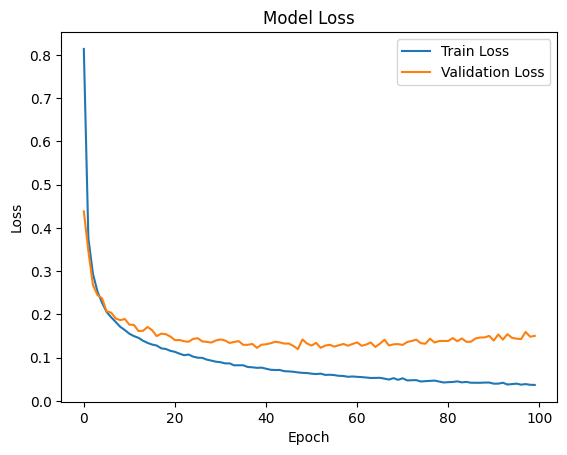

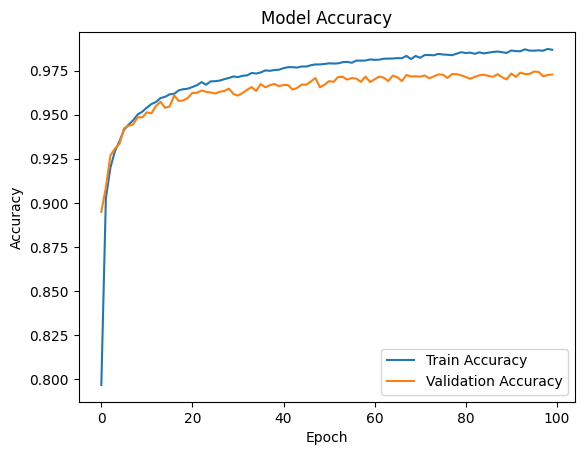

Final Train Loss: 0.0368
Final Train Accuracy: 98.6798%
Final Validation Loss: 0.1502
Final Validation Accuracy: 97.2761%


In [ ]:
# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Ultimate loss and training accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

# Last loss and validation accuracy
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Train Loss: {:.4f}".format(final_train_loss))
print("Final Train Accuracy: {:.4%}".format(final_train_accuracy))
print("Final Validation Loss: {:.4f}".format(final_val_loss))
print("Final Validation Accuracy: {:.4%}".format(final_val_accuracy))

# **Modello with Early Stopping Optimization**

In [ ]:
# Construction of the ANN model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilation of the template
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Model training with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
1009/1009 [==============================] - 5s 4ms/step - loss: 0.7716 - accuracy: 0.8082 - val_loss: 0.4810 - val_accuracy: 0.8834
Epoch 2/100
1009/1009 [==============================] - 6s 6ms/step - loss: 0.3833 - accuracy: 0.9030 - val_loss: 0.3488 - val_accuracy: 0.9114
Epoch 3/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.3047 - accuracy: 0.9198 - val_loss: 0.2806 - val_accuracy: 0.9244
Epoch 4/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.2617 - accuracy: 0.9284 - val_loss: 0.2500 - val_accuracy: 0.9309
Epoch 5/100
1009/1009 [==============================] - 6s 5ms/step - loss: 0.2314 - accuracy: 0.9354 - val_loss: 0.2463 - val_accuracy: 0.9337
Epoch 6/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.2098 - accuracy: 0.9410 - val_loss: 0.2237 - val_accuracy: 0.9361
Epoch 7/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9444 - val_loss: 0.2158 - val_ac

In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


673/673 [==============================] - 1s 2ms/step - loss: 0.1250 - accuracy: 0.9712
Test Loss: 0.12497568130493164
Test Accuracy: 0.9711802005767822


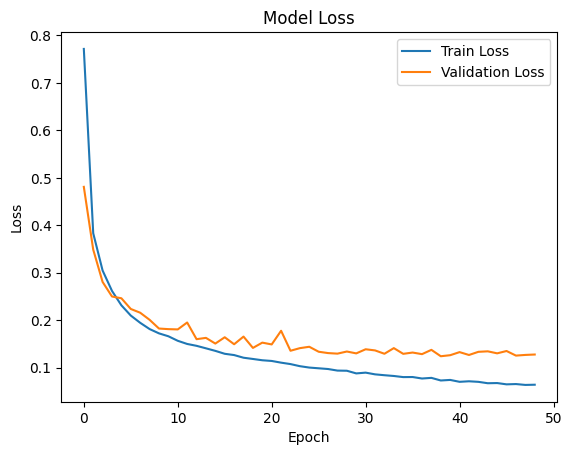

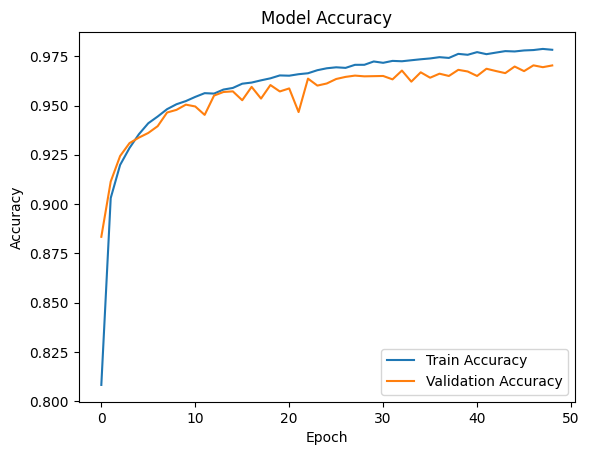

Final Train Loss: 0.0642
Final Train Accuracy: 97.8292%
Final Validation Loss: 0.1278
Final Validation Accuracy: 97.0344%


In [ ]:
# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Ultimate loss and training accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

# Last loss and validation accuracy
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Train Loss: {:.4f}".format(final_train_loss))
print("Final Train Accuracy: {:.4%}".format(final_train_accuracy))
print("Final Validation Loss: {:.4f}".format(final_val_loss))
print("Final Validation Accuracy: {:.4%}".format(final_val_accuracy))

# **Random Forest as a benchmark**

To check the quality of the cleaning and processing of our dataset, we decided to compare the results of our artificial neural network (ANN) model with those of a Random Forest model, used as a benchmark. The choice of the Random Forest model is motivated by its popularity and effectiveness in the field of classification.

In [ ]:
# Building the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Puoi variare il numero di alberi con n_estimators

# Training the Random Forest model
rf_model.fit(X_train, y_train)

# Evaluation of the Random Forest model on the test set
y_pred_rf = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Random Forest Test Accuracy: {rf_test_accuracy}')


Random Forest Test Accuracy: 0.9817319760145029


In [ ]:
# Prediction on training data
y_train_pred = rf_model.predict(X_train)

# Prediction on test data
y_test_pred = rf_model.predict(X_test)

In [ ]:
# Calculation of training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9998450501262841
Test Accuracy: 0.9817319760145029


# **ANN model with six variables**

In [ ]:
data = pd.read_csv('df_normalized_for_model.csv')

# Select only the 6 desired features plus the target column
features = ['Iva', 'Ateco', 'TIva', 'Conto', 'CoDitta', 'Rev']
X = data[features]
y = data['IvaM']

# Target coding for classification
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Division of data into training, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [ ]:
# Construction of the ANN model
model = Sequential()
model.add(Dense(256, input_dim=6, activation='relu'))  # Imposta input_dim a 6
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilation of the template
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callback di Early Stopping per evitare l'overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training with validation
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/100
1009/1009 [==============================] - 5s 4ms/step - loss: 0.9796 - accuracy: 0.7595 - val_loss: 0.6045 - val_accuracy: 0.8554
Epoch 2/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.5402 - accuracy: 0.8612 - val_loss: 0.5022 - val_accuracy: 0.8640
Epoch 3/100
1009/1009 [==============================] - 5s 5ms/step - loss: 0.4476 - accuracy: 0.8809 - val_loss: 0.4224 - val_accuracy: 0.8840
Epoch 4/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.3908 - accuracy: 0.8957 - val_loss: 0.3779 - val_accuracy: 0.9019
Epoch 5/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.3470 - accuracy: 0.9085 - val_loss: 0.3294 - val_accuracy: 0.9107
Epoch 6/100
1009/1009 [==============================] - 6s 6ms/step - loss: 0.3181 - accuracy: 0.9158 - val_loss: 0.3122 - val_accuracy: 0.9160
Epoch 7/100
1009/1009 [==============================] - 4s 4ms/step - loss: 0.3034 - accuracy: 0.9175 - val_loss: 0.2961 - val_ac

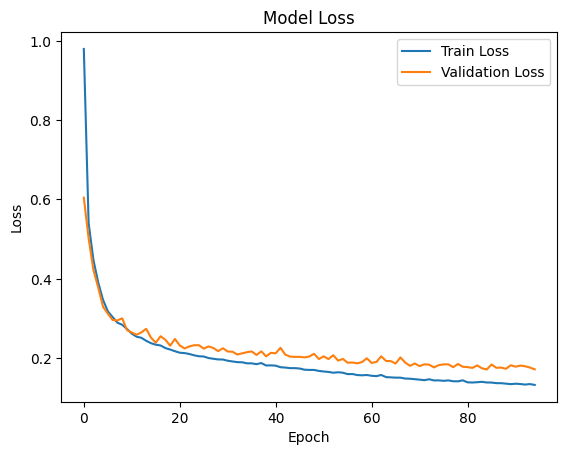

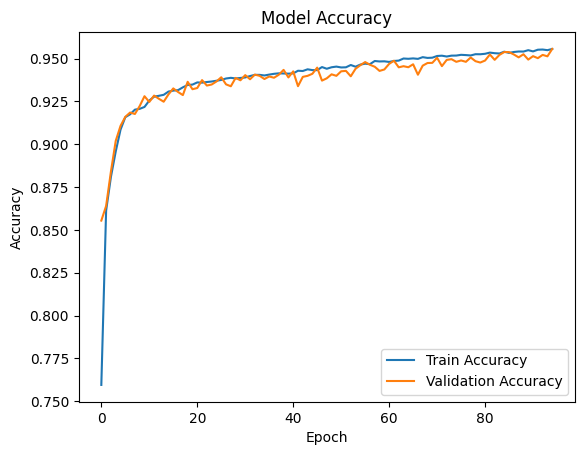

Final Train Loss: 0.1324
Final Train Accuracy: 95.5622%
Final Validation Loss: 0.1716
Final Validation Accuracy: 95.5655%


In [ ]:
# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Ultimate loss and training accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

# Last loss and validation accuracy
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Train Loss: {:.4f}".format(final_train_loss))
print("Final Train Accuracy: {:.4%}".format(final_train_accuracy))
print("Final Validation Loss: {:.4f}".format(final_val_loss))
print("Final Validation Accuracy: {:.4%}".format(final_val_accuracy))

# **User interface implementation**

In [ ]:
# Save the trained model
model.save('ANN_Model_with_6_features.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'Vat’ and ‘Rev’, are converted to numeric formats through a pre-trained encoder. This step is crucial to ensure that the categorical variables are compatible with the model. After encoding, all data are normalised using a pre-trained scaler, ensuring that the values are aligned with the scales used during the model training phase.

In [ ]:
# Load the training dataset
data = pd.read_csv('cleaned_dataset.csv')

# Preparing the encoder for "Iva" and "Rev"
encoder = OrdinalEncoder()
data[['Iva', 'Rev']] = encoder.fit_transform(data[['Iva', 'Rev']])

# Preparing the scaler for all features
scaler = MinMaxScaler()
data[['Iva', 'Ateco', 'TIva', 'Conto', 'CoDitta', 'Rev']] = scaler.fit_transform(data[['Iva', 'Ateco', 'TIva', 'Conto', 'CoDitta', 'Rev']])

# Save the encoder and scaler
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

<ipython-input-70-422ab160b674>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_dataset.csv')


In [ ]:
# Load the encoder and scaler
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


In [ ]:
# 'IvaM' is the target column
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(data['IvaM'])

# Save label mapping
label_mapping = {index: label for index, label in enumerate(encoder.classes_)}
with open('label_mapping.pkl', 'wb') as f:
    pickle.dump(label_mapping, f)


We create several input widgets to collect feature values from the user, a “Predict” button to trigger the prediction, and an output label to show the prediction result. After that, we define the make_prediction function which collects data from the widgets and transforms it via encoding and normalization, and passes it to the model to make a prediction. The collected data is inserted into a DataFrame, then transformed using the encoder and scaler. (We use some example values for the predection, the correct value of IvaM with these example value is 374)

In [ ]:
# Load the model, encoder, scaler and label mapping
model = load_model('ANN_Model_with_6_features.h5')
with open('/content/encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)
with open('/content/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('/content/label_mapping.pkl', 'rb') as f:
    label_mapping = pickle.load(f)

# Creation of widgets for inserting features with placeholders
iva_input = widgets.Text(description="Iva:", placeholder="Enter the IVA code")
ateco_input = widgets.Text(description="Ateco:", placeholder="Enter Ateco code")
tiva_input = widgets.Text(description="TIva:", placeholder="Enter IVA type")
conto_input = widgets.Text(description="Conto:", placeholder="Enter Account number")
coditta_input = widgets.Text(description="CoDitta:", placeholder="Enter Ditta code")
rev_input = widgets.Text(description="Rev:", placeholder="Insert Rev")
predict_button = widgets.Button(description="Predict", button_style='success')
output_label = widgets.Label()

# Widget Display
display(iva_input, ateco_input, tiva_input, conto_input, coditta_input, rev_input, predict_button, output_label)

def make_prediction(b):
    # Collect input data
    input_data = pd.DataFrame([[
        iva_input.value, ateco_input.value, tiva_input.value, conto_input.value, coditta_input.value, rev_input.value
    ]], columns=['Iva', 'Ateco', 'TIva', 'Conto', 'CoDitta', 'Rev'])

    # Apply encoding and scaling
    input_data[['Iva', 'Rev']] = encoder.transform(input_data[['Iva', 'Rev']])
    input_data = scaler.transform(input_data)

    # Make the prediction
    prediction = model.predict(input_data)
    predicted_index = np.argmax(prediction)  # Get the index of the most probable category
    predicted_ivaM = label_mapping[predicted_index]  # Convert index to label

    # Show the result
    output_label.value = f'Predicted IvaM: {predicted_ivaM}'

predict_button.on_click(make_prediction)


Text(value='', description='Iva:', placeholder='Enter the IVA code')

Text(value='', description='Ateco:', placeholder='Enter Ateco code')

Text(value='', description='TIva:', placeholder='Enter IVA type')

Text(value='', description='Conto:', placeholder='Enter Account number')

Text(value='', description='CoDitta:', placeholder='Enter Ditta code')

Text(value='', description='Rev:', placeholder='Insert Rev')

Button(button_style='success', description='Predict', style=ButtonStyle())

Label(value='')

1/1 [==============================] - 0s 21ms/step
